In [396]:
import numpy as np
%matplotlib widget

In [397]:
def oneHotEncode(column, uniqueValues):
    oneHotEncodedColumn = np.zeros((len(column), len(uniqueValues)))
    for i in range(len(column)):
        oneHotEncodedColumn[i][list(uniqueValues).index(column[i])] = 1
    return oneHotEncodedColumn.astype(int)

In [398]:
def printRepartion(column, uniqueValues, message = ""):
    print(f"--- Values repartition {message} ---")
    for i in range(len(uniqueValues)):
        nb = len(column[column == uniqueValues[i]])
        print(uniqueValues[i], ":", len(column[column == uniqueValues[i]]), "(", round(nb / len(column) * 100, 1), "%)")
    print("\n")

In [399]:
def plotRepartition(column, uniqueValues):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.bar(uniqueValues, [len(column[column == uniqueValues[i]]) for i in range(len(uniqueValues))])
    plt.show()

In [400]:
#Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice

#==> we keep the following columns: + means we one hot encode it, = means we keep it as is
#MSSubClass +, MSZoning =, LotFrontage =, Stree +, Alley +, LotShape +,
#LandContour +, Utilities +, LotConfig +, LandSlope +, Neighborhood +,
#Condition1 +, Condition2 +, BldgType +, HouseStyle +, OverallQual =,
#OverallCond =, // YearBuilt // =, // YearRemodAdd // =, RoofStyle +, RoofMatl +, 
#Exterior1st +, Exterior2nd +, MasVnrType +, MasVnrArea =, ExterQual +,
#ExterCond +, Foundation +, BsmtQual +, BsmtCond +, BsmtExposure +,
#BsmtFinType1 +, BsmtFinSF1 =, BsmtFinType2 +, BsmtFinSF2 =, BsmtUnfSF =,
#TotalBsmtSF =, Heating +, HeatingQC +, CentralAir +, Electrical +,
#1stFlrSF =, 2ndFlrSF =, LowQualFinSF =, GrLivArea =, BsmtFullBath =,
#BsmtHalfBath =, FullBath =, HalfBath =, Bedroom =, Kitchen =, // KitchenQual //,
#TotRmsAbvGrd =, // Functional // +, Fireplaces =, // FireplaceQu // +, 
#GarageType +, // GarageYrBlt // =, // GarageFinish + //, GarageCars =, 
#GarageArea =, // GarageQual // +, // GarageCond // +, // PavedDrive // +,
#WoodDeckSF =, OpenPorchSF =, EnclosedPorch =, 3SsnPorch =, ScreenPorch =,
#PoolArea =, // PoolQC // +, // Fence // +, ?? MiscFeature ?? +, ?? MiscVal ?? =,
#// MoSold //=, // YrSold // =, SaleType +, SaleCondition +

In [401]:
with open("train.csv") as f:
    lines = f.readlines()

header = lines[0].split(",") #header
lines = lines[1:]

data = np.array([line.split(",") for line in lines])

#increase print size
np.set_printoptions(threshold=np.inf)

print(header)
print(data.shape)



['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

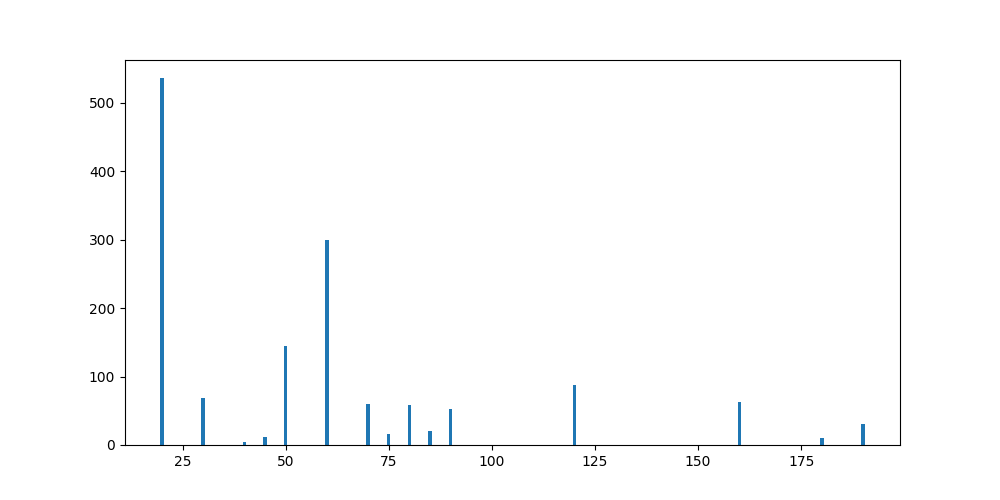

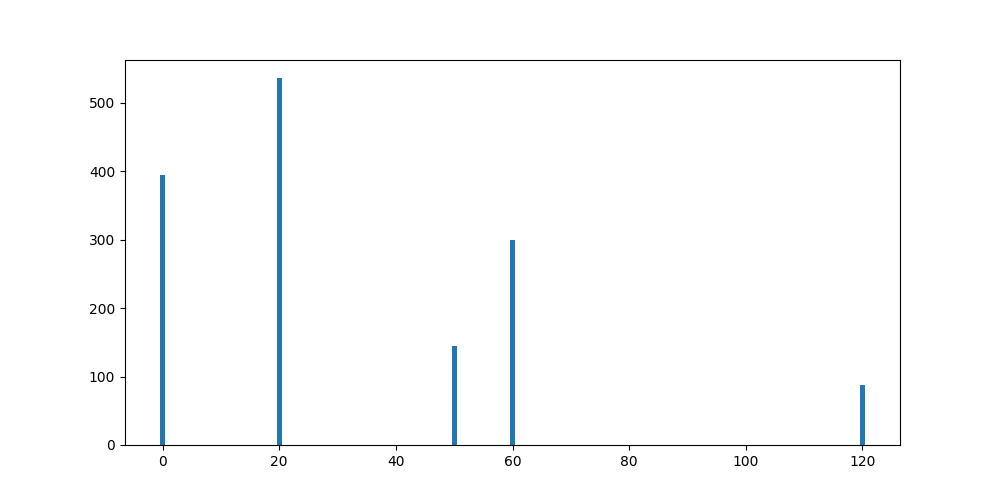

In [402]:
#MSSubClass
MSSubClass = data[:, 1].copy().astype(int)
uniqueMSSubClass = np.array((20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190))
# printRepartion(MSSubClass, uniqueMSSubClass)
plotRepartition(MSSubClass, uniqueMSSubClass)

#we only keep the 4 most common values
MSSubClass = np.array([MSSubClass[i] if MSSubClass[i] in (20, 60, 50, 120) else 0 for i in range(len(MSSubClass))])
uniqueMSSubClass = np.array((0, 20, 60, 50, 120))
plotRepartition(MSSubClass, uniqueMSSubClass)

oneHotEncodedMSSubClass = oneHotEncode(MSSubClass, uniqueMSSubClass)

--- Values repartition  ---
A : 0 ( 0.0 %)
C (all) : 10 ( 0.7 %)
FV : 65 ( 4.5 %)
I : 0 ( 0.0 %)
RH : 16 ( 1.1 %)
RL : 1151 ( 78.8 %)
RP : 0 ( 0.0 %)
RM : 218 ( 14.9 %)


--- Values repartition  ---
other : 91 ( 6.2 %)
RL : 1151 ( 78.8 %)
RM : 218 ( 14.9 %)




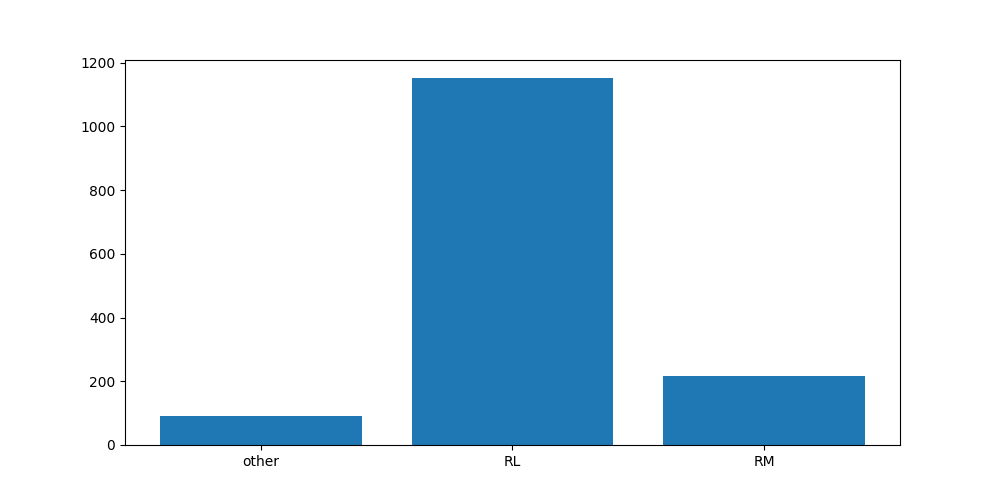

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]


In [403]:
#MSZoning
MSZoning = data[:,2].copy()
uniqueMSZoning = np.array(["A", "C (all)", "FV", "I", "RH", "RL", "RP", "RM"])
printRepartion(MSZoning, uniqueMSZoning)

#we keep RL, RM, and others are grouped in "other"
MSZoning[MSZoning == "A"] = "other"
MSZoning[MSZoning == "C (all)"] = "other"
MSZoning[MSZoning == "FV"] = "other"
MSZoning[MSZoning == "I"] = "other"
MSZoning[MSZoning == "RH"] = "other"
MSZoning[MSZoning == "RP"] = "other"
uniqueMSZoning = np.array(["other", "RL", "RM"])

printRepartion(MSZoning, uniqueMSZoning)
plotRepartition(MSZoning, uniqueMSZoning)

oneHotEncodedMSZoning = oneHotEncode(MSZoning, uniqueMSZoning)
print(oneHotEncodedMSZoning[:10])

In [404]:
#LotFrontage
LotFrontage = data[:,3].copy()
LotFrontage[LotFrontage == "NA"] = np.nan
LotFrontage = LotFrontage.astype(float)
print(LotFrontage[:20])

[65. 80. 68. 60. 84. 85. 75. nan 51. 50. 70. 85. nan 91. nan 51. nan 72.
 66. 70.]


In [405]:
#LotArea
LotArea = data[:,4].copy().astype(float)
print(LotArea[:20])

[ 8450.  9600. 11250.  9550. 14260. 14115. 10084. 10382.  6120.  7420.
 11200. 11924. 12968. 10652. 10920.  6120. 11241. 10791. 13695.  7560.]


--- Values repartition  ---
Grvl : 6 ( 0.4 %)
Pave : 1454 ( 99.6 %)




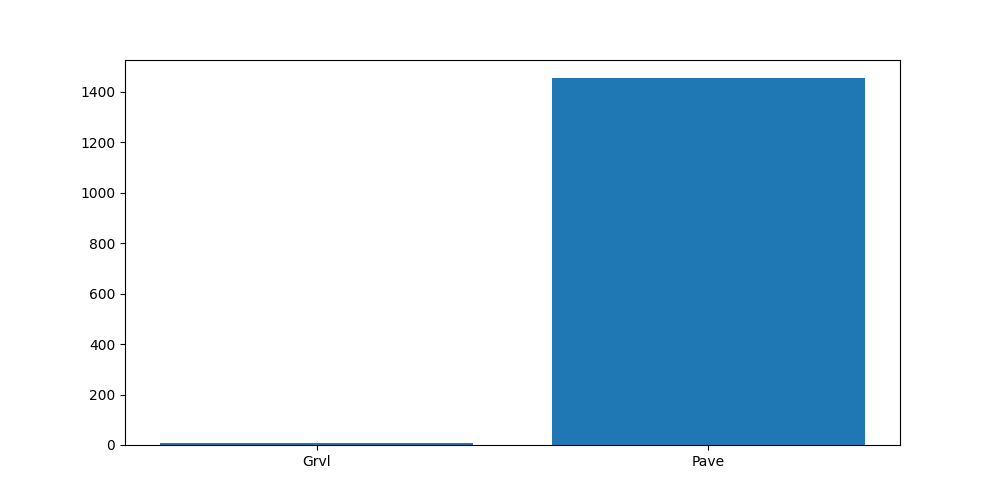

In [406]:
#TO IGNORE : Grvl is ultra rare

#Street
Street = data[:,5].copy()
uniqueStreet = np.array(["Grvl", "Pave"])

printRepartion(Street, uniqueStreet)
plotRepartition(Street, uniqueStreet)

# oneHotEncodedStreet = oneHotEncode(Street, uniqueStreet)
# print(oneHotEncodedStreet[:10]) #1 0 is rare

In [407]:
#Alley
Alley = data[:,6].copy()
uniqueAlley = np.array(["Grvl", "Pave", "NA"])

printRepartion(Alley, uniqueAlley)

#We keep only NA and other
Alley[Alley == "Grvl"] = "other"
Alley[Alley == "Pave"] = "other"
uniqueAlley = np.array(["NA", "other"])

printRepartion(Alley, uniqueAlley, "after cleaning")

oneHotEncodedAlley = oneHotEncode(Alley, uniqueAlley)
print(oneHotEncodedAlley[:10]) #almost all NA

--- Values repartition  ---
Grvl : 50 ( 3.4 %)
Pave : 41 ( 2.8 %)
NA : 1369 ( 93.8 %)


--- Values repartition after cleaning ---
NA : 1369 ( 93.8 %)
other : 91 ( 6.2 %)


[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]


In [408]:
#LotShape
LotShape = data[:,7].copy()
lotshape_mapping = {"Reg": 0, "IR1": 1, "IR2": 2, "IR3": 3}

printRepartion(LotShape, list(lotshape_mapping.keys()))

#We only keep Reg and others are grouped in "other"
LotShape[LotShape == "IR1"] = "other"
LotShape[LotShape == "IR2"] = "other"
LotShape[LotShape == "IR3"] = "other"
lotshape_mapping = {"Reg": 0, "other": 1}

printRepartion(LotShape, list(lotshape_mapping.keys()), "after cleaning")

LotShape = np.array([lotshape_mapping[shape] for shape in LotShape])
print(data[:20, 7])
print(LotShape[:20])

--- Values repartition  ---
Reg : 925 ( 63.4 %)
IR1 : 484 ( 33.2 %)
IR2 : 41 ( 2.8 %)
IR3 : 10 ( 0.7 %)


--- Values repartition after cleaning ---
Reg : 925 ( 63.4 %)
other : 535 ( 36.6 %)


['Reg' 'Reg' 'IR1' 'IR1' 'IR1' 'IR1' 'Reg' 'IR1' 'Reg' 'Reg' 'Reg' 'IR1'
 'IR2' 'IR1' 'IR1' 'Reg' 'IR1' 'Reg' 'Reg' 'Reg']
[0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0]


In [409]:
#LandContour
LandContour = data[:,8].copy()
landcontour_mapping = {"Lvl": 0, "Bnk": 1, "HLS": 2, "Low": 3}

printRepartion(LandContour, list(landcontour_mapping.keys()))

#We only keep Lvl and others are grouped in "other"
LandContour[LandContour != "Lvl"] = "other"
landcontour_mapping = {"Lvl": 0, "other": 1}
printRepartion(LandContour, list(landcontour_mapping.keys()), "after cleaning")

LandContour = np.array([landcontour_mapping[contour] for contour in LandContour])
print(data[:10, 8])
print(LandContour[:100])

--- Values repartition  ---
Lvl : 1311 ( 89.8 %)
Bnk : 63 ( 4.3 %)
HLS : 50 ( 3.4 %)
Low : 36 ( 2.5 %)


--- Values repartition after cleaning ---
Lvl : 1311 ( 89.8 %)
other : 149 ( 10.2 %)


['Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl' 'Lvl']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


In [410]:
#TO IGNORE : AllPub is ultra majoritary

#Utilities
Utilities = data[:,9].copy()
utilities_mapping = {"AllPub": 0, "NoSewr": 1, "NoSeWa": 2, "ELO": 3}

printRepartion(Utilities, list(utilities_mapping.keys()))

# Utilities = np.array([utilities_mapping[utility] for utility in Utilities])
# print(data[:10, 9])
# print(Utilities[:10])

--- Values repartition  ---
AllPub : 1459 ( 99.9 %)
NoSewr : 0 ( 0.0 %)
NoSeWa : 1 ( 0.1 %)
ELO : 0 ( 0.0 %)




--- Values repartition  ---
Inside : 1052 ( 72.1 %)
Corner : 263 ( 18.0 %)
CulDSac : 94 ( 6.4 %)
FR2 : 47 ( 3.2 %)
FR3 : 4 ( 0.3 %)




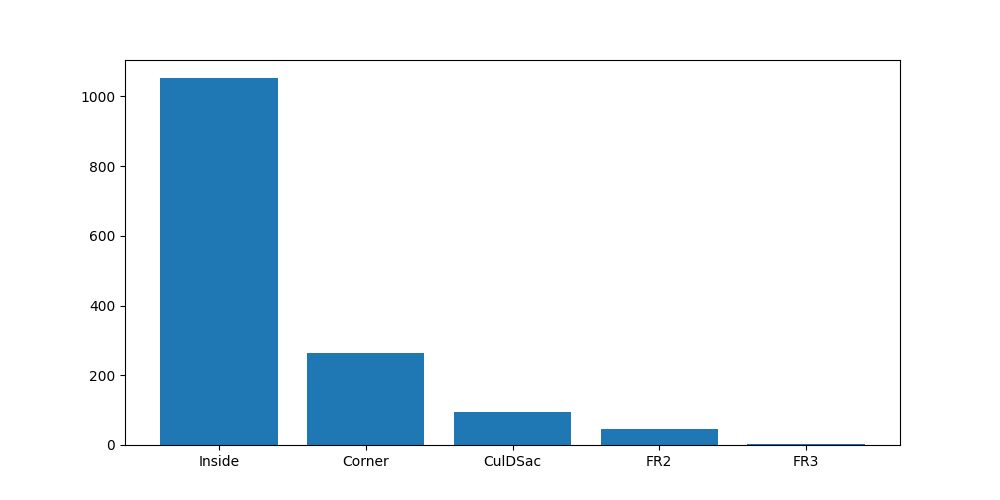

--- Values repartition  ---
Inside : 1052 ( 72.1 %)
Corner : 263 ( 18.0 %)
CulDSac : 94 ( 6.4 %)
other : 51 ( 3.5 %)




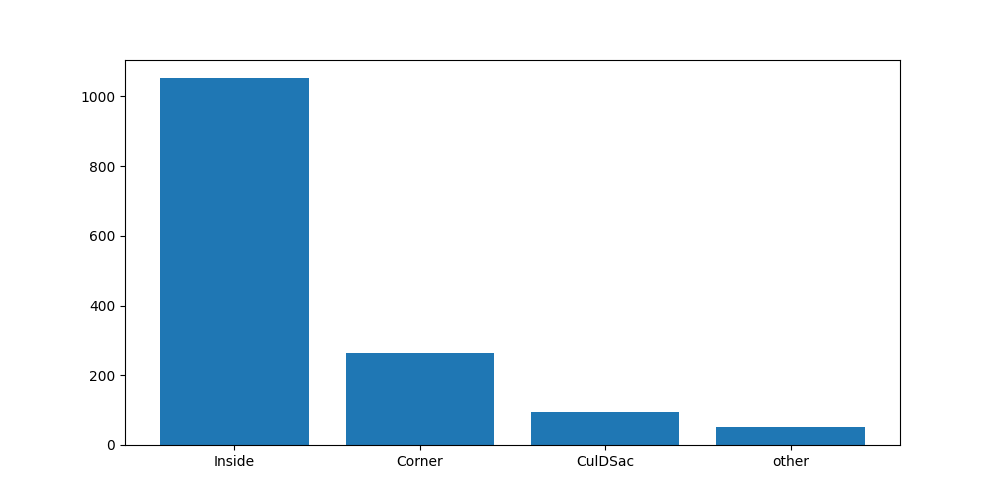

[[1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]]


In [411]:
#TO DECIDE : we keep it or not ?

#LotConfig
LotConfig = data[:,10].copy()
uniqueLotConfig = np.array(["Inside", "Corner", "CulDSac", "FR2", "FR3"])

printRepartion(LotConfig, uniqueLotConfig)
plotRepartition(LotConfig, uniqueLotConfig)

#we only keep the 4 most common values$
LotConfig[LotConfig == "FR2"] = "other"
LotConfig[LotConfig == "FR3"] = "other"
uniqueLotConfig = np.array(["Inside", "Corner", "CulDSac", "other"])

printRepartion(LotConfig, uniqueLotConfig)
plotRepartition(LotConfig, uniqueLotConfig)

oneHotEncodedLotConfig = oneHotEncode(LotConfig, uniqueLotConfig)
print(oneHotEncodedLotConfig[:10])


In [412]:
#TO IGNORE : Sev is ultra rare and Mod is rare

#LandSlope
LandSlope = data[:,11].copy()
landslope_mapping = {"Gtl": 0, "Mod": 1, "Sev": 2}

printRepartion(LandSlope, list(landslope_mapping.keys()))

#We only keep Gtl and others are grouped in "other"
LandSlope[LandSlope != "Gtl"] = "other"
landslope_mapping = {"Gtl": 0, "other": 1}

printRepartion(LandSlope, list(landslope_mapping.keys()), "after cleaning")

# LandSlope = np.array([landslope_mapping[slope] for slope in LandSlope])
# print(data[:100, 11])
# print(LandSlope[:100])

--- Values repartition  ---
Gtl : 1382 ( 94.7 %)
Mod : 65 ( 4.5 %)
Sev : 13 ( 0.9 %)


--- Values repartition after cleaning ---
Gtl : 1382 ( 94.7 %)
other : 78 ( 5.3 %)




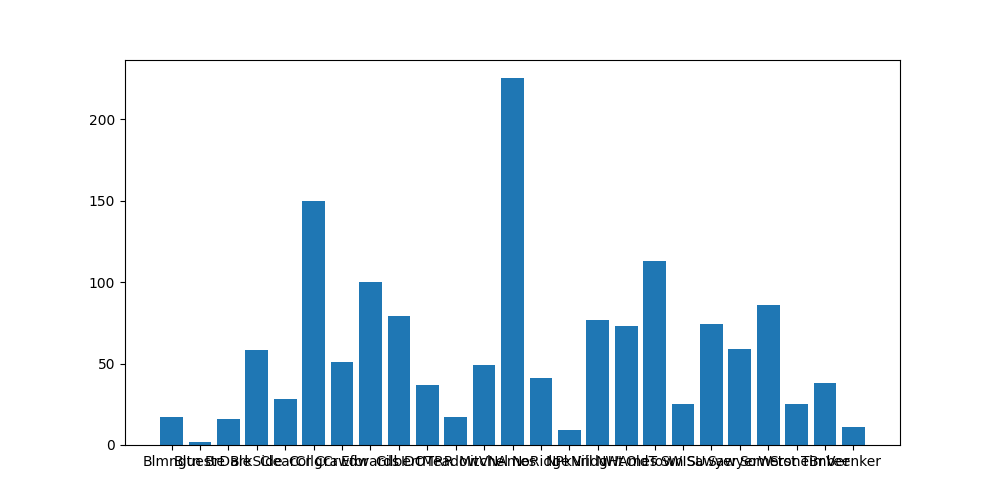

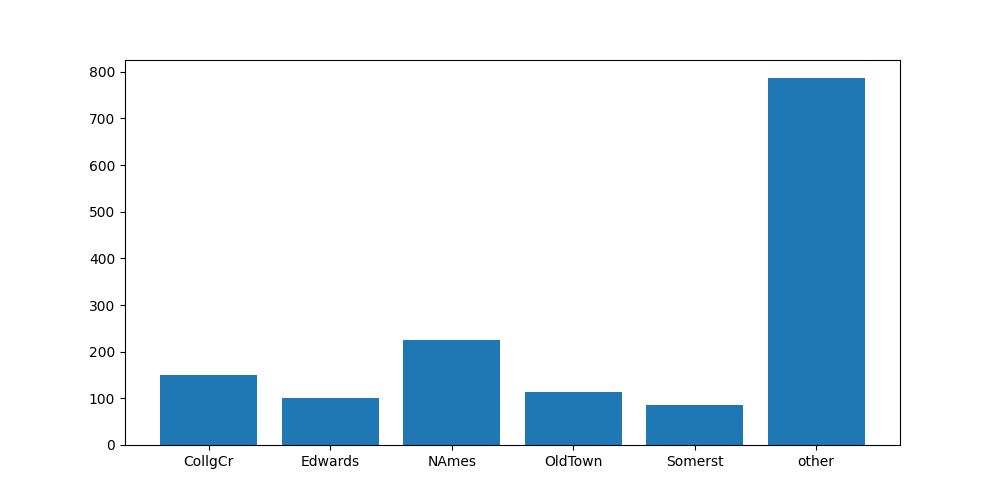

--- Values repartition after cleaning ---
CollgCr : 150 ( 10.3 %)
Edwards : 100 ( 6.8 %)
NAmes : 225 ( 15.4 %)
OldTown : 113 ( 7.7 %)
Somerst : 86 ( 5.9 %)
other : 786 ( 53.8 %)


[[1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]


In [413]:
#TO CHECK : we keep it or not ?

#Neighborhood
Neighborhood = data[:,12].copy()
uniqueNeighborhood = np.array(["Blmngtn", "Blueste", "BrDale", "BrkSide", "ClearCr", 
                               "CollgCr", "Crawfor", "Edwards", "Gilbert", "IDOTRR", 
                               "MeadowV", "Mitchel", "NAmes", "NoRidge", "NPkVill", 
                               "NridgHt", "NWAmes", "OldTown", "SWISU", "Sawyer", 
                               "SawyerW", "Somerst", "StoneBr", "Timber", "Veenker"])

# printRepartion(Neighborhood, uniqueNeighborhood)
plotRepartition(Neighborhood, uniqueNeighborhood)

#we only keep the categories with more than 90 houses
for value in uniqueNeighborhood:
    if len(Neighborhood[Neighborhood == value]) < 80:
        Neighborhood[Neighborhood == value] = "other"
        uniqueNeighborhood = uniqueNeighborhood[uniqueNeighborhood != value]

uniqueNeighborhood = np.append(uniqueNeighborhood, "other")

# printRepartion(Neighborhood, uniqueNeighborhood)
plotRepartition(Neighborhood, uniqueNeighborhood)
printRepartion(Neighborhood, uniqueNeighborhood, "after cleaning")

oneHotEncodedNeighborhood = oneHotEncode(Neighborhood, uniqueNeighborhood)
print(oneHotEncodedNeighborhood[:10])


In [414]:
#Condition1
Condition1 = data[:,13].copy()
uniqueCondition1 = np.array(["Artery", "Feedr", "Norm", "RRNn",
                             "RRAn", "PosN", "PosA", "RRNe", "RRAe"])

printRepartion(Condition1, uniqueCondition1, "condition 1 before cleaning")

#we only keep Norm and others are grouped in "other"
Condition1[Condition1 != "Norm"] = "other"
uniqueCondition1 = np.array(["Norm", "other"])

printRepartion(Condition1, uniqueCondition1, "condition 1 after cleaning")

oneHotEncodedCondition1 = oneHotEncode(Condition1, uniqueCondition1)

#TO REMOVE : Norm is ultra majoritary
#Condition2
Condition2 = data[:,14]
uniqueCondition2 = np.array(["Artery", "Feedr", "Norm", "RRNn",
                             "RRAn", "PosN", "PosA", "RRNe", "RRAe"])
# printRepartion(Condition2, uniqueCondition2, "condition 2 before cleaning")
# oneHotEncodedCondition2 = oneHotEncode(Condition2, uniqueCondition2)

# #union of condition1 and condition2
# oneHotEncodedCondition = np.logical_or(oneHotEncodedCondition1, oneHotEncodedCondition2).astype(int)

print(oneHotEncodedCondition1[:10])



--- Values repartition condition 1 before cleaning ---
Artery : 48 ( 3.3 %)
Feedr : 81 ( 5.5 %)
Norm : 1260 ( 86.3 %)
RRNn : 5 ( 0.3 %)
RRAn : 26 ( 1.8 %)
PosN : 19 ( 1.3 %)
PosA : 8 ( 0.5 %)
RRNe : 2 ( 0.1 %)
RRAe : 11 ( 0.8 %)


--- Values repartition condition 1 after cleaning ---
Norm : 1260 ( 86.3 %)
other : 200 ( 13.7 %)


[[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]


--- Values repartition  ---
1Fam : 1220 ( 83.6 %)
2fmCon : 31 ( 2.1 %)
Duplex : 52 ( 3.6 %)
TwnhsE : 114 ( 7.8 %)
Twnhs : 43 ( 2.9 %)




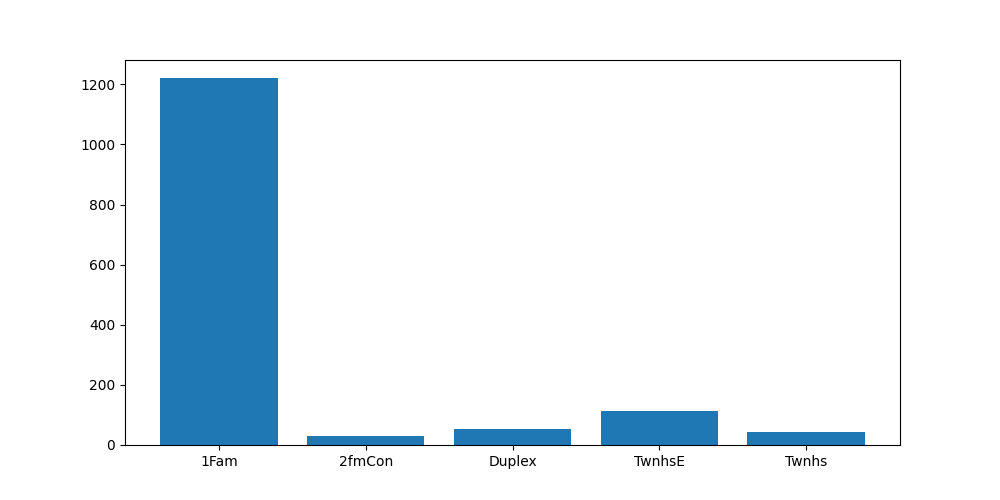

--- Values repartition after cleaning ---
1Fam : 1220 ( 83.6 %)
other : 240 ( 16.4 %)




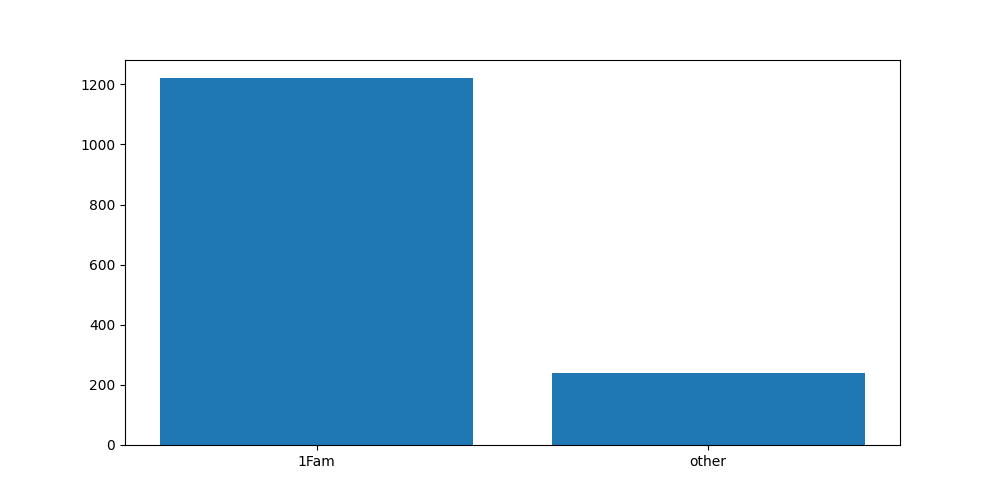

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


In [415]:
#BldgType
BldgType = data[:,15].copy()
uniqueBldgType = np.array(["1Fam", "2fmCon", "Duplex", "TwnhsE", "Twnhs"])

printRepartion(BldgType, uniqueBldgType)
plotRepartition(BldgType, uniqueBldgType)

#we only keep 1Fam and others are grouped in "other"
BldgType[BldgType != "1Fam"] = "other"
uniqueBldgType = np.array(["1Fam", "other"])

printRepartion(BldgType, uniqueBldgType, "after cleaning")
plotRepartition(BldgType, uniqueBldgType)

oneHotEncodedBldgType = oneHotEncode(BldgType, uniqueBldgType)
print(oneHotEncodedBldgType[:10])


--- Values repartition  ---
1Story : 726 ( 49.7 %)
1.5Fin : 154 ( 10.5 %)
1.5Unf : 14 ( 1.0 %)
2Story : 445 ( 30.5 %)
2.5Fin : 8 ( 0.5 %)
2.5Unf : 11 ( 0.8 %)
SFoyer : 37 ( 2.5 %)
SLvl : 65 ( 4.5 %)




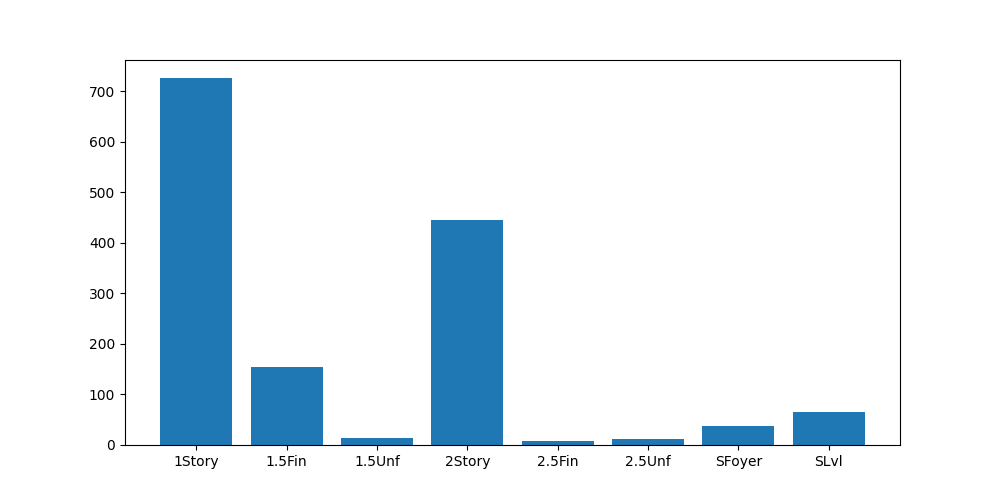

--- Values repartition after cleaning ---
1Story : 726 ( 49.7 %)
1.5Fin : 154 ( 10.5 %)
2Story : 445 ( 30.5 %)
other : 135 ( 9.2 %)




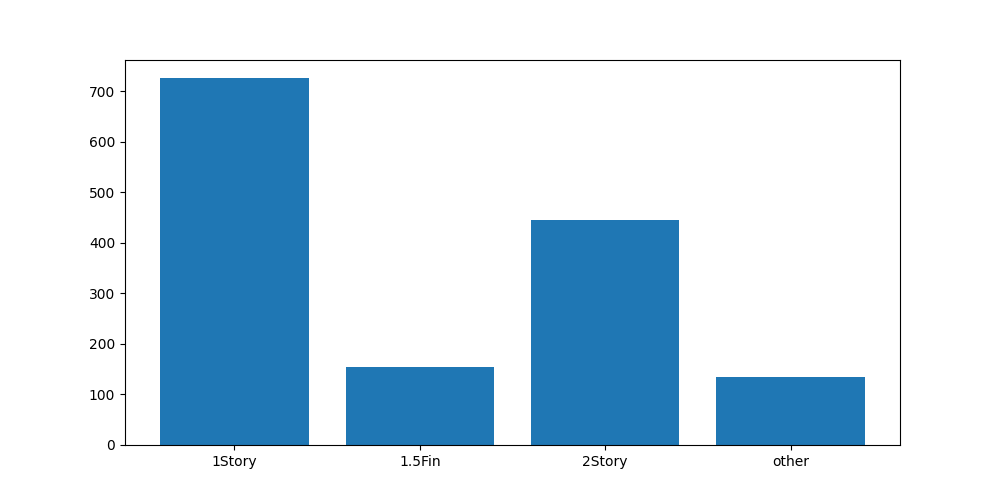

[[0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


In [416]:
#HouseStyle
HouseStyle = data[:,16].copy()
uniqueHouseStyle = np.array(["1Story", "1.5Fin", "1.5Unf", "2Story", "2.5Fin", "2.5Unf", "SFoyer", "SLvl"])

printRepartion(HouseStyle, uniqueHouseStyle)
plotRepartition(HouseStyle, uniqueHouseStyle)

#we only keep the first 3 categories
HouseStyle[~np.isin(HouseStyle,  ["1Story", "1.5Fin", "2Story"])] = "other"
uniqueHouseStyle = np.array(["1Story", "1.5Fin", "2Story", "other"])

printRepartion(HouseStyle, uniqueHouseStyle, "after cleaning")
plotRepartition(HouseStyle, uniqueHouseStyle)
oneHotEncodedHouseStyle = oneHotEncode(HouseStyle, uniqueHouseStyle)
print(oneHotEncodedHouseStyle[:10])

In [417]:
#OverallQual
OverallQual = data[:,17].copy().astype(int)
print(OverallQual[:10])

#OverallCond
OverallCond = data[:,18].copy().astype(int)
print(OverallCond[:10])


[7 6 7 7 8 5 8 7 7 5]
[5 8 5 5 5 5 5 6 5 6]


In [418]:
#Get sold year
YearSold = data[:,77].copy().astype(int)
print(YearSold[:10])

[2008 2007 2008 2006 2008 2009 2007 2009 2008 2008]


In [419]:
#YearBuilt
YearBuilt = data[:,19].copy().astype(int)
print(YearBuilt[:10])

delta_YearSold_YearBuilt = YearSold - YearBuilt
print(delta_YearSold_YearBuilt[:10])

[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939]
[ 5 31  7 91  8 16  3 36 77 69]


In [420]:
#YearRemodAdd
YearRemodAdd = data[:,20].copy().astype(int)

delta_YearSold_YearRemodAdd = YearSold - YearRemodAdd
print(delta_YearSold_YearRemodAdd[:10])

[ 5 31  6 36  8 14  2 36 58 58]


--- Values repartition  ---
Flat : 13 ( 0.9 %)
Gable : 1141 ( 78.2 %)
Gambrel : 11 ( 0.8 %)
Hip : 286 ( 19.6 %)
Mansard : 7 ( 0.5 %)
Shed : 2 ( 0.1 %)




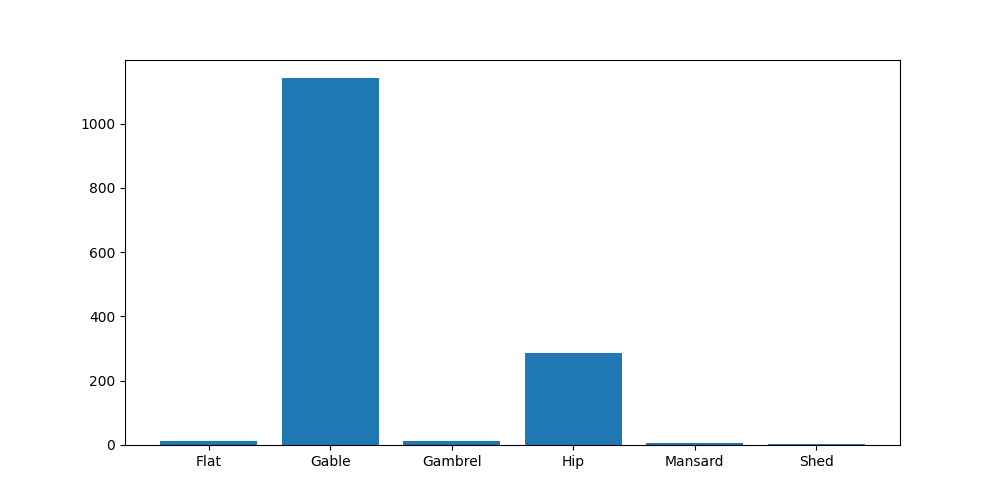

--- Values repartition after cleaning ---
Gable : 1141 ( 78.2 %)
other : 319 ( 21.8 %)




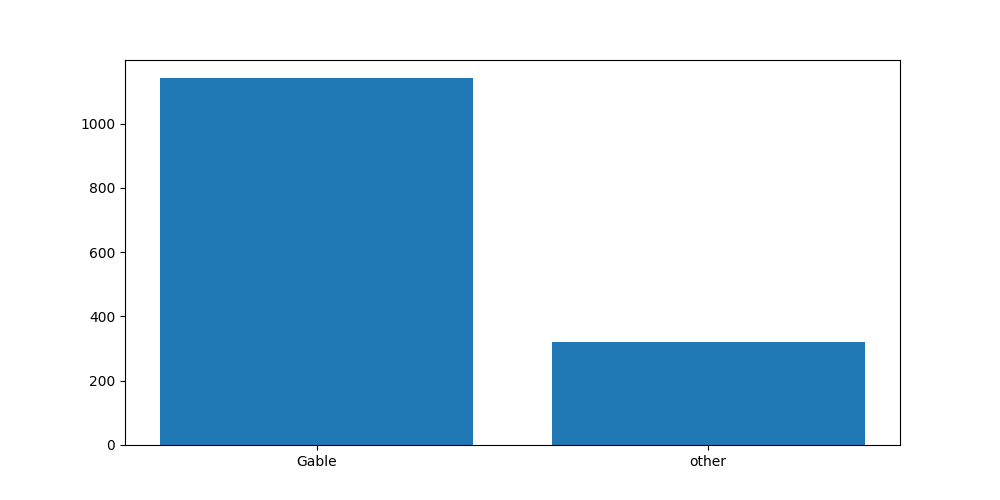

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]


In [421]:
#RoofStyle
RoofStyle = data[:,21].copy()
uniqueRoofStyle = np.array(["Flat", "Gable", "Gambrel", "Hip", "Mansard", "Shed"])

printRepartion(RoofStyle, uniqueRoofStyle)
plotRepartition(RoofStyle, uniqueRoofStyle)

#we only keep Gable and others are grouped in "other"
RoofStyle[RoofStyle != "Gable"] = "other"
uniqueRoofStyle = np.array(["Gable", "other"])

printRepartion(RoofStyle, uniqueRoofStyle, "after cleaning")
plotRepartition(RoofStyle, uniqueRoofStyle)

oneHotEncodedRoofStyle = oneHotEncode(RoofStyle, uniqueRoofStyle)
print(oneHotEncodedRoofStyle[:10])

--- Values repartition  ---
ClyTile : 1 ( 0.1 %)
CompShg : 1434 ( 98.2 %)
Membran : 1 ( 0.1 %)
Metal : 1 ( 0.1 %)
Roll : 1 ( 0.1 %)
Tar&Grv : 11 ( 0.8 %)
WdShake : 5 ( 0.3 %)
WdShngl : 6 ( 0.4 %)




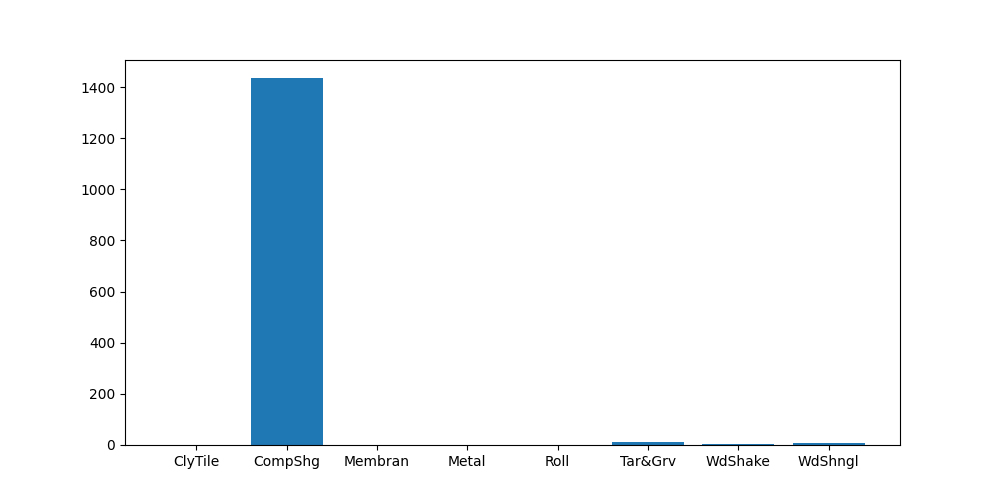

In [422]:
#TO IGNORE : CompShg is ultra majoritary

#RoofMatl
RoofMatl = data[:,22].copy()
uniqueRoofMatl = np.array(["ClyTile", "CompShg", "Membran", "Metal", "Roll", "Tar&Grv", 
                           "WdShake", "WdShngl"])

printRepartion(RoofMatl, uniqueRoofMatl)
plotRepartition(RoofMatl, uniqueRoofMatl)

# oneHotEncodedRoofMatl = oneHotEncode(RoofMatl, uniqueRoofMatl)
# print(oneHotEncodedRoofMatl[:10])

--- Values repartition after cleaning ---
HdBoard : 222 ( 15.2 %)
MetalSd : 220 ( 15.1 %)
Plywood : 108 ( 7.4 %)
VinylSd : 515 ( 35.3 %)
Wd Sdng : 206 ( 14.1 %)
other : 189 ( 12.9 %)




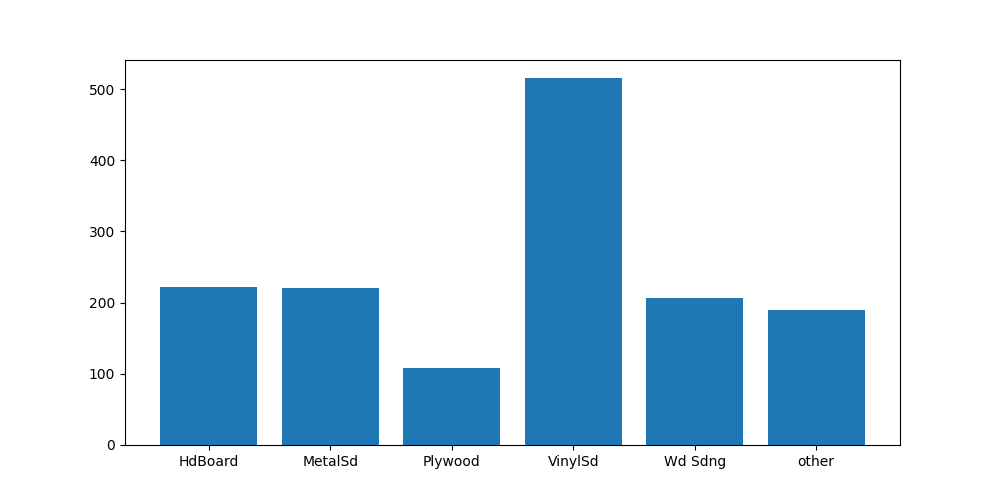

--- Values repartition after cleaning ---
HdBoard : 207 ( 14.2 %)
MetalSd : 214 ( 14.7 %)
Plywood : 142 ( 9.7 %)
VinylSd : 504 ( 34.5 %)
Wd Sdng : 197 ( 13.5 %)
other : 196 ( 13.4 %)




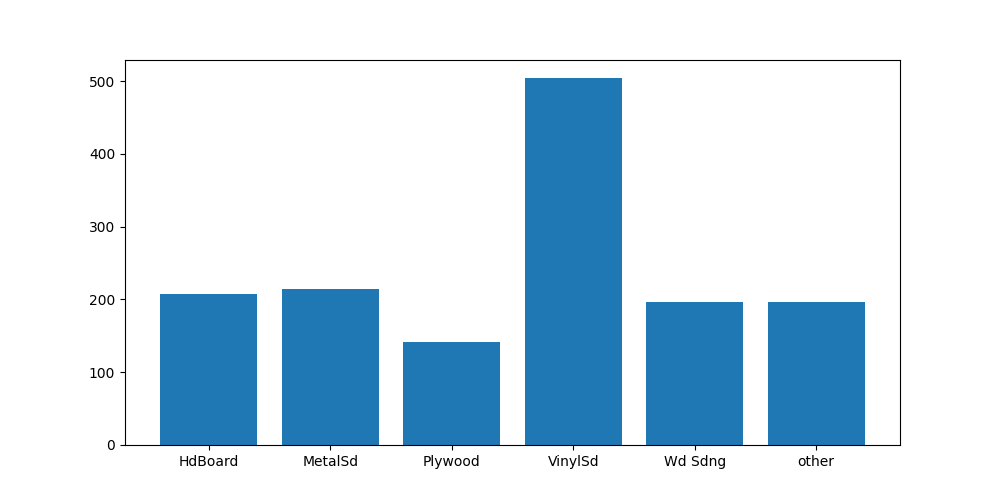

[[0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]]


In [430]:
#Exterior1st
Exterior1st = data[:,23].copy()
Exterior1st[Exterior1st == "Wd Shng"] = "WdShing"
Exterior1st[Exterior1st == "Brk Cmn"] = "BrkComm"
Exterior1st[Exterior1st == "CmentBd"] = "CemntBd"

uniqueExterior = np.array(["AsbShng", "AsphShn", "BrkComm", "BrkFace", "CBlock", 
                              "CemntBd", "HdBoard", "ImStucc", "MetalSd", "Other", 
                              "Plywood", "PreCast", "Stone", "Stucco", "VinylSd", 
                              "Wd Sdng", "WdShing"])

# printRepartion(Exterior1st, uniqueExterior)
# plotRepartition(Exterior1st, uniqueExterior)

#we only keep the values with more than 100 houses
for value in uniqueExterior:
    if len(Exterior1st[Exterior1st == value]) < 100:
        Exterior1st[Exterior1st == value] = "other"
        uniqueExterior = uniqueExterior[uniqueExterior != value]
uniqueExterior = np.append(uniqueExterior, "other")

printRepartion(Exterior1st, uniqueExterior, "after cleaning")
plotRepartition(Exterior1st, uniqueExterior)

oneHotEncodedExterior1st = oneHotEncode(Exterior1st, uniqueExterior)

#Exterior2nd
Exterior2nd = data[:,24].copy()
Exterior2nd[Exterior2nd == "Wd Shng"] = "WdShing"
Exterior2nd[Exterior2nd == "Brk Cmn"] = "BrkComm"
Exterior2nd[Exterior2nd == "CmentBd"] = "CemntBd"

# printRepartion(Exterior2nd, uniqueExterior)
# plotRepartition(Exterior2nd, uniqueExterior)

Exterior2nd[~np.isin(Exterior2nd,  uniqueExterior)] = "other"

printRepartion(Exterior2nd, uniqueExterior, "after cleaning")
plotRepartition(Exterior2nd, uniqueExterior)

oneHotEncodedExterior2nd = oneHotEncode(Exterior2nd, uniqueExterior)

#union of exterior1st and exterior2nd
oneHotEncodedExterior = np.logical_or(oneHotEncodedExterior1st, oneHotEncodedExterior2nd).astype(int)
print(oneHotEncodedExterior[:10])

--- Values repartition  ---
BrkCmn : 15 ( 1.0 %)
BrkFace : 445 ( 30.5 %)
CBlock : 0 ( 0.0 %)
NA : 872 ( 59.7 %)
Stone : 128 ( 8.8 %)




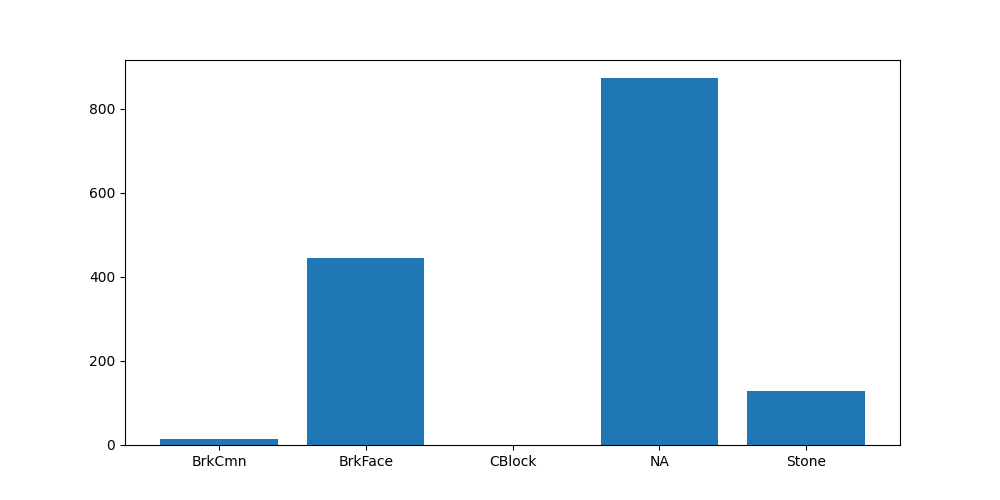

--- Values repartition after cleaning ---
NA : 872 ( 59.7 %)
BrkFace : 445 ( 30.5 %)
other : 143 ( 9.8 %)




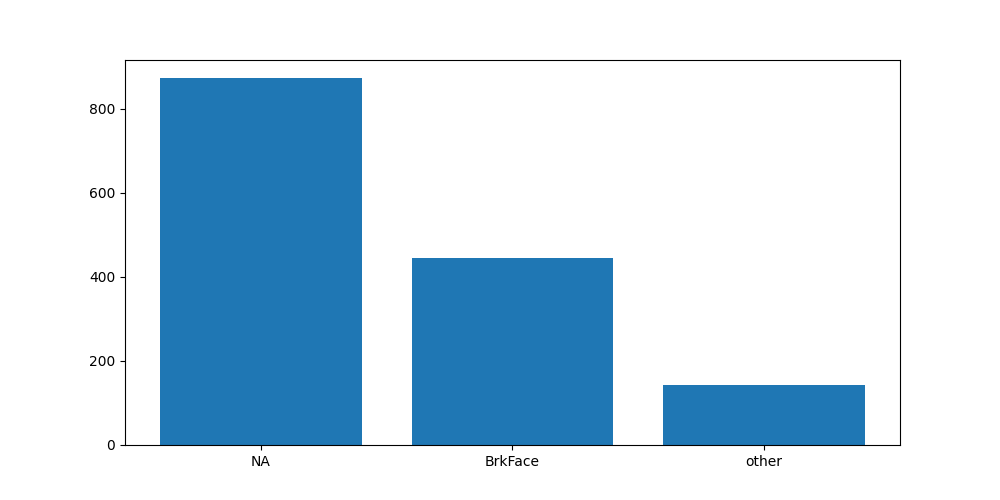

[[0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]]


In [432]:
#MasVnrType
MasVnrType = data[:,25].copy()
MasVnrType[MasVnrType == "None"] = "NA"
uniqueMasVnrType = np.array(["BrkCmn", "BrkFace", "CBlock", "NA", "Stone"])

printRepartion(MasVnrType, uniqueMasVnrType)
plotRepartition(MasVnrType, uniqueMasVnrType)

#we only keep NA and BrkFace and others are grouped in "other"
MasVnrType[~np.isin(MasVnrType,  ["NA", "BrkFace"])] = "other"
uniqueMasVnrType = np.array(["NA", "BrkFace", "other"])

printRepartion(MasVnrType, uniqueMasVnrType, "after cleaning")
plotRepartition(MasVnrType, uniqueMasVnrType)

oneHotEncodedMasVnrType = oneHotEncode(MasVnrType, uniqueMasVnrType)
print(oneHotEncodedMasVnrType[:10])

In [433]:
#MasVnrArea
MasVnrArea = data[:,26].copy()
MasVnrArea[MasVnrArea == "NA"] = np.nan
MasVnrArea = MasVnrArea.astype(float)
print(MasVnrArea[:100])

[ 196.    0.  162.    0.  350.    0.  186.  240.    0.    0.    0.  286.
    0.  306.  212.    0.  180.    0.    0.    0.  380.    0.  281.    0.
    0.  640.    0.  200.    0.    0.    0.    0.    0.    0.  246.  132.
    0.  650.    0.    0.  101.    0.    0.    0.    0.  412.    0.    0.
    0.    0.    0.    0.    0.    0.    0.  272.  456.    0. 1031.    0.
    0.    0.  178.    0.  573.  344.  287.  167.    0.    0. 1115.    0.
   40.  104.    0.    0.    0.    0.    0.    0.  576.  443.  468.   66.
   22.  284.    0.   76.    0.    0.    0.  203.    0.    0.    0.   68.
  183.   48.    0.    0.]


--- Values repartition  ---
0 : 52 ( 3.6 %)
1 : 488 ( 33.4 %)
2 : 906 ( 62.1 %)
3 : 14 ( 1.0 %)
4 : 0 ( 0.0 %)




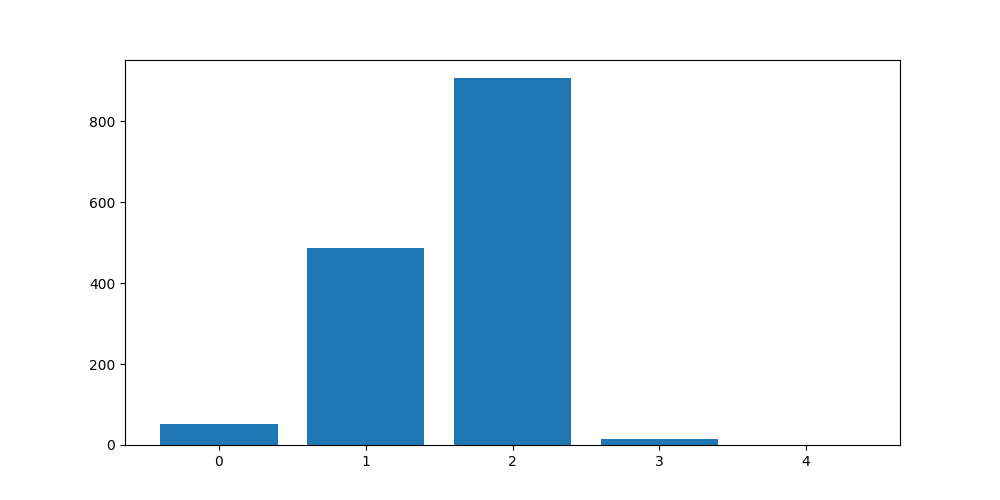

--- Values repartition after cleaning ---
1 : 540 ( 37.0 %)
2 : 920 ( 63.0 %)




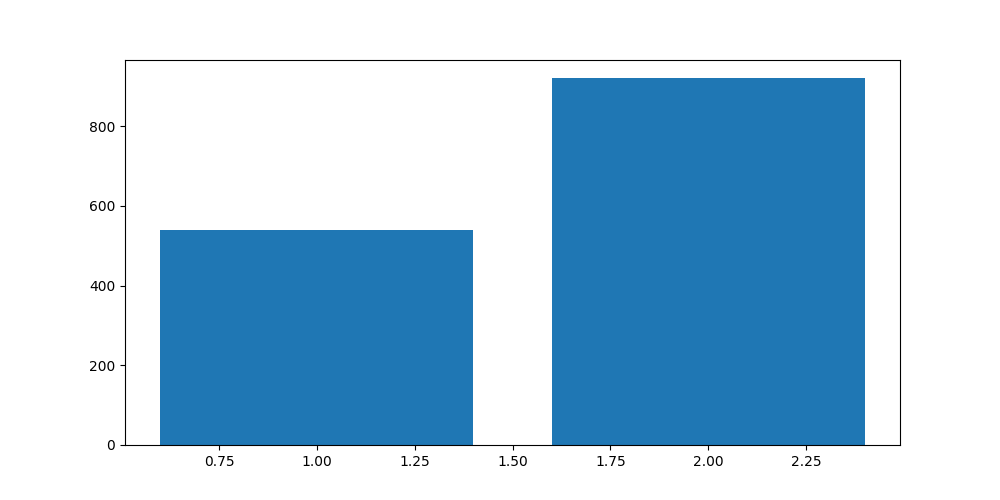

['Gd' 'TA' 'Gd' 'TA' 'Gd' 'TA' 'Gd' 'TA' 'TA' 'TA']
[1 2 1 2 1 2 1 2 2 2]


In [438]:
#ExterQual
ExterQual = data[:,27].copy()
exterqual_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4}
ExterQual = np.array([exterqual_mapping[qual] for qual in ExterQual])

printRepartion(ExterQual, list(exterqual_mapping.values()))
plotRepartition(ExterQual, list(exterqual_mapping.values()))

#we only keep 1-2 , 0 is merged with 1 and the others are merged in 2
ExterQual[ExterQual == 0] = 1
ExterQual[ExterQual > 2] = 2
exterqual_mapping = {"Ex, Gd": 1, "TA, Fa, Po": 2}

printRepartion(ExterQual, list(exterqual_mapping.values()), "after cleaning")
plotRepartition(ExterQual, list(exterqual_mapping.values()))

print(data[:10, 27])
print(ExterQual[:10])

--- Values repartition  ---
0 : 3 ( 0.2 %)
1 : 146 ( 10.0 %)
2 : 1282 ( 87.8 %)
3 : 28 ( 1.9 %)
4 : 1 ( 0.1 %)




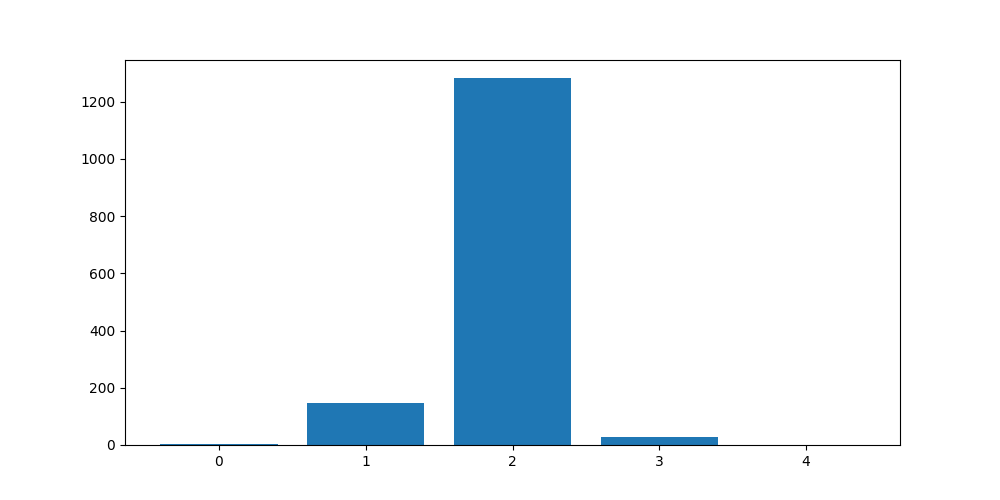

--- Values repartition after cleaning ---
0 : 149 ( 10.2 %)
1 : 1311 ( 89.8 %)




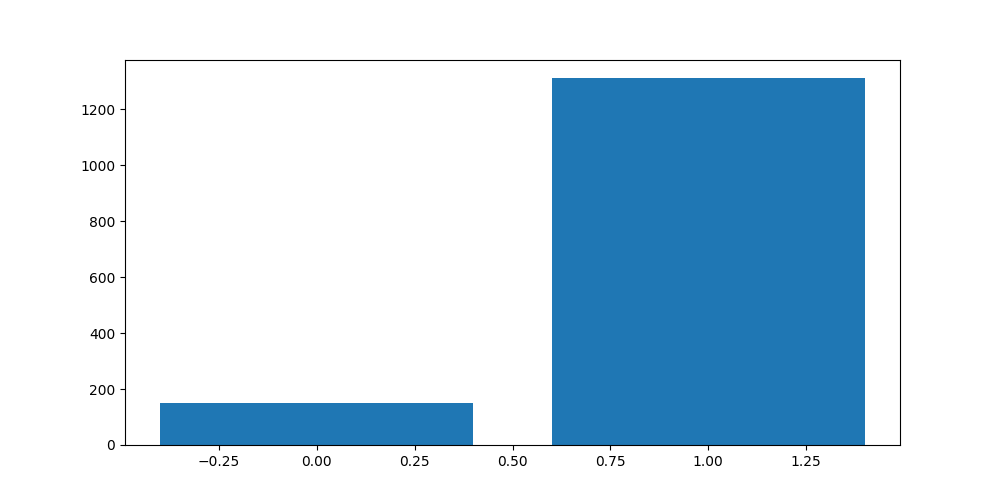

['TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA']
[1 1 1 1 1 1 1 1 1 1]


In [440]:
#ExterCond
ExterCond = data[:,28].copy()
extercond_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4}
ExterCond = np.array([extercond_mapping[cond] for cond in ExterCond])

printRepartion(ExterCond, list(extercond_mapping.values()))
plotRepartition(ExterCond, list(extercond_mapping.values()))

#0 <= [0, 1] and 1 <= [2, 3, 4] 
ExterCond[ExterCond <= 1] = 0
ExterCond[ExterCond > 1] = 1
extercond_mapping = {"Ex, Gd": 0, "TA, Fa, Po": 1}

printRepartion(ExterCond, list(extercond_mapping.values()), "after cleaning")
plotRepartition(ExterCond, list(extercond_mapping.values()))

print(data[:10, 28])
print(ExterCond[:10])

--- Values repartition  ---
BrkTil : 146 ( 10.0 %)
CBlock : 634 ( 43.4 %)
PConc : 647 ( 44.3 %)
Slab : 24 ( 1.6 %)
Stone : 6 ( 0.4 %)
Wood : 3 ( 0.2 %)




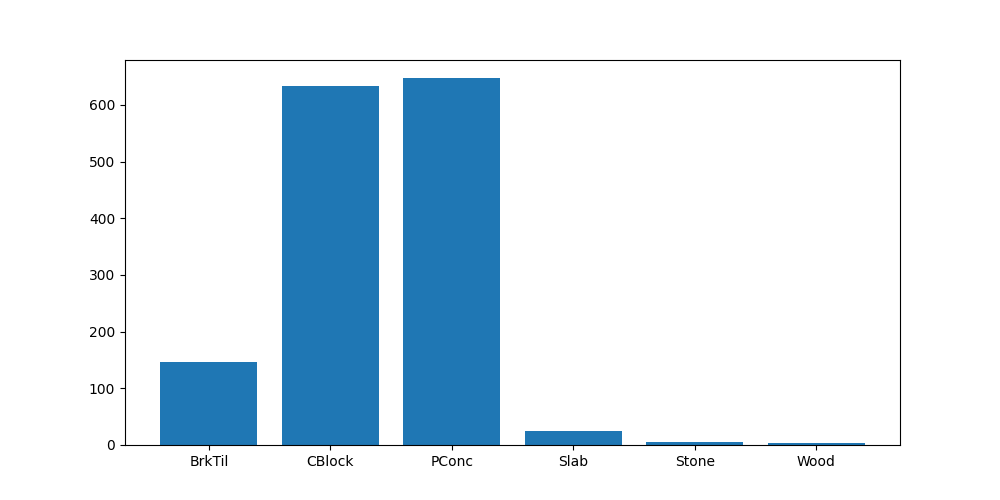

--- Values repartition after cleaning ---
PConc : 647 ( 44.3 %)
CBlock : 634 ( 43.4 %)
other : 179 ( 12.3 %)




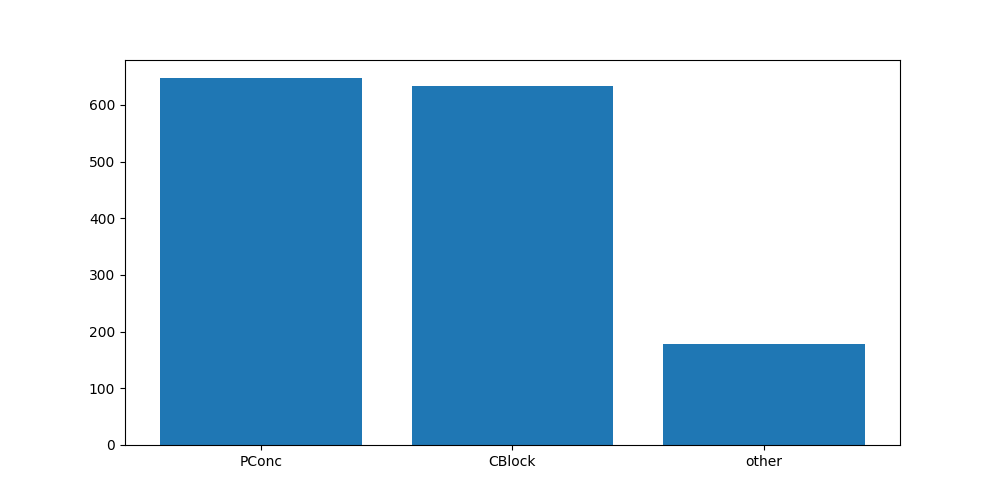

[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


In [442]:
#Foundation
Foundation = data[:,29].copy()
uniqueFoundation = np.array(["BrkTil", "CBlock", "PConc", "Slab", "Stone", "Wood"])

printRepartion(Foundation, uniqueFoundation)
plotRepartition(Foundation, uniqueFoundation)

#we only keep PConc and CBlock and others are grouped in "other"
Foundation[~np.isin(Foundation,  ["PConc", "CBlock"])] = "other"
uniqueFoundation = np.array(["PConc", "CBlock", "other"])

printRepartion(Foundation, uniqueFoundation, "after cleaning")
plotRepartition(Foundation, uniqueFoundation)

oneHotEncodedFoundation = oneHotEncode(Foundation, uniqueFoundation)
print(oneHotEncodedFoundation[:10])


--- Values repartition  ---
0 : 121 ( 8.3 %)
1 : 618 ( 42.3 %)
2 : 649 ( 44.5 %)
3 : 35 ( 2.4 %)
4 : 0 ( 0.0 %)
5 : 37 ( 2.5 %)




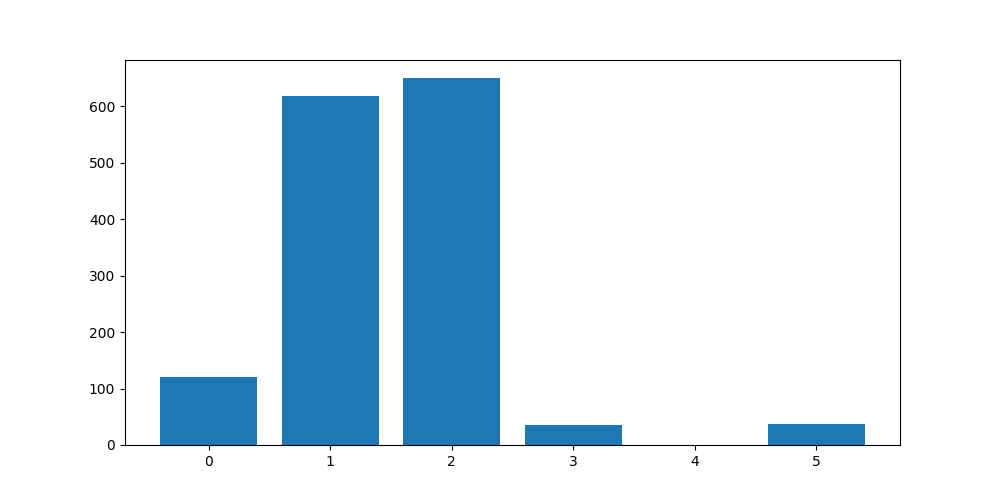

--- Values repartition after cleaning ---
0 : 739 ( 50.6 %)
1 : 721 ( 49.4 %)




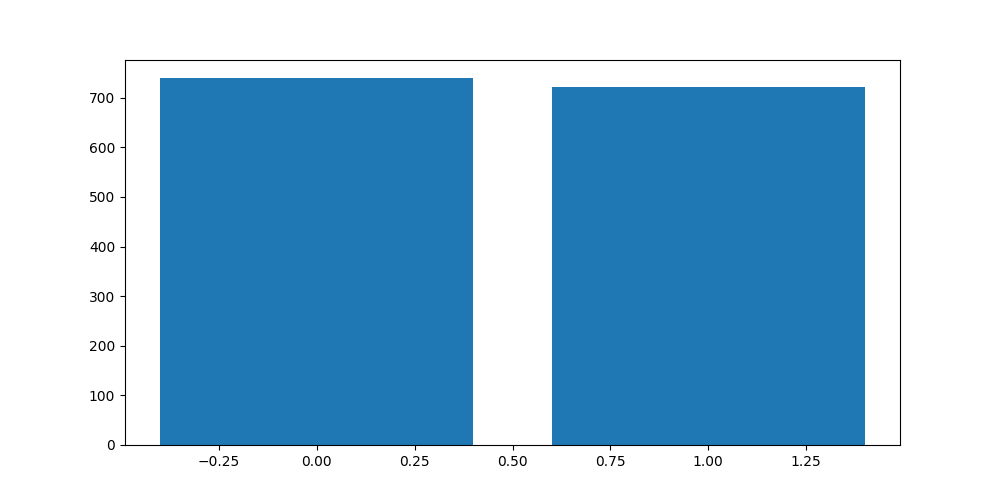

['Gd' 'Gd' 'Gd' 'TA' 'Gd' 'Gd' 'Ex' 'Gd' 'TA' 'TA']
[0 0 0 1 0 0 0 0 1 1]


In [444]:
#BsmtQual
BsmtQual = data[:,30].copy()
BsmtQual_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "NA": 5}
BsmtQual = np.array([BsmtQual_mapping[qual] for qual in BsmtQual])

printRepartion(BsmtQual, list(BsmtQual_mapping.values()))
plotRepartition(BsmtQual, list(BsmtQual_mapping.values()))

#0 <= [0, 1] and 1 <= [2, 3, 4]
BsmtQual[BsmtQual <= 1] = 0
BsmtQual[BsmtQual > 1] = 1

BsmtQual_mapping = {"Ex, Gd": 0, "TA, Fa, Po, NA": 1}

printRepartion(BsmtQual, list(BsmtQual_mapping.values()), "after cleaning")
plotRepartition(BsmtQual, list(BsmtQual_mapping.values()))

print(data[:10, 30])
print(BsmtQual[:10])

--- Values repartition  ---
0 : 0 ( 0.0 %)
1 : 65 ( 4.5 %)
2 : 1311 ( 89.8 %)
3 : 45 ( 3.1 %)
4 : 2 ( 0.1 %)
5 : 37 ( 2.5 %)




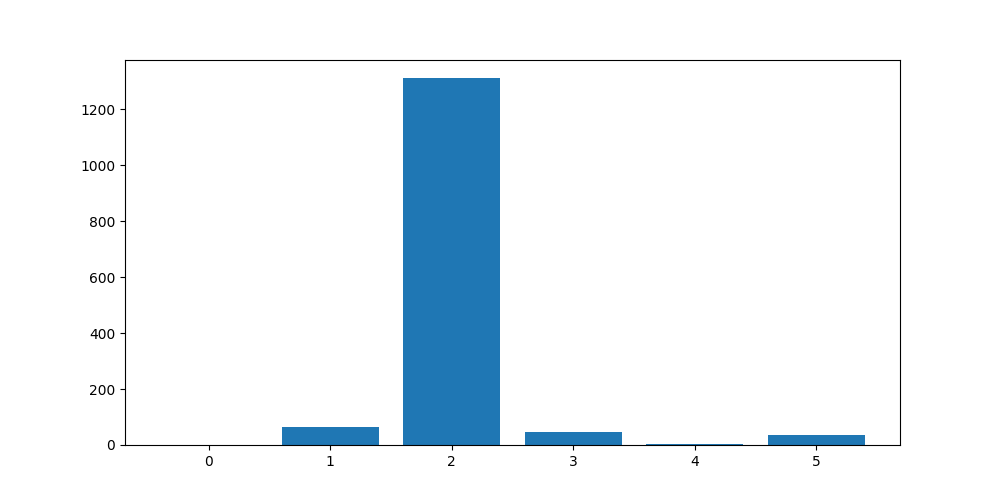

--- Values repartition after cleaning ---
0 : 65 ( 4.5 %)
1 : 1395 ( 95.5 %)




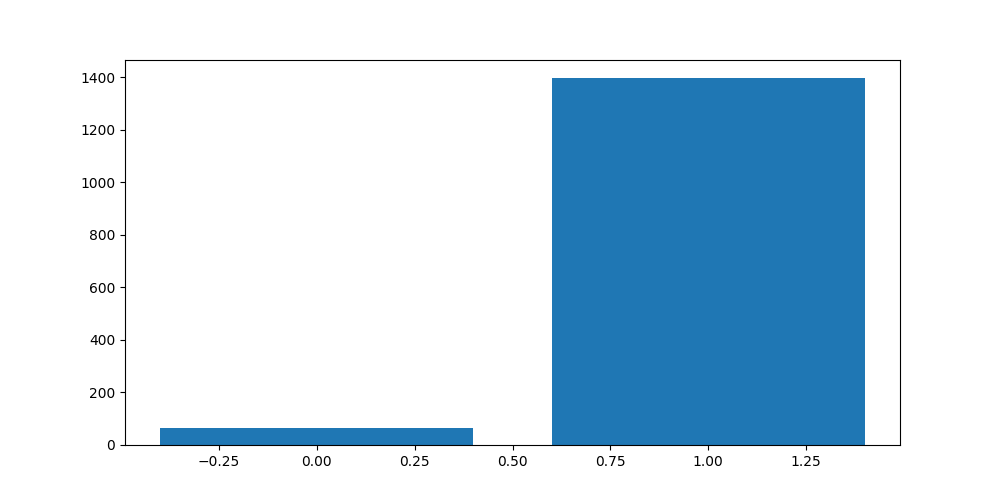

['TA' 'TA' 'TA' 'Gd' 'TA' 'TA' 'TA' 'TA' 'TA' 'TA']
[1 1 1 0 1 1 1 1 1 1]


In [448]:
#TO CHECK : we keep it or not ?

#BsmtCond
BsmtCond = data[:,31].copy()
BsmtCond_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "NA": 5}
BsmtCond = np.array([BsmtCond_mapping[cond] for cond in BsmtCond])

printRepartion(BsmtCond, list(BsmtCond_mapping.values()))
plotRepartition(BsmtCond, list(BsmtCond_mapping.values()))

#0 <= [0, 1] and 1 <= [2, 3, 4]
BsmtCond[BsmtCond <= 1] = 0
BsmtCond[BsmtCond > 1] = 1

BsmtCond_mapping = {"Ex, Gd": 0, "TA, Fa, Po, NA": 1}

printRepartion(BsmtCond, list(BsmtCond_mapping.values()), "after cleaning")
plotRepartition(BsmtCond, list(BsmtCond_mapping.values()))

print(data[:10, 31])
print(BsmtCond[:10])

--- Values repartition  ---
0 : 134 ( 9.2 %)
1 : 221 ( 15.1 %)
2 : 114 ( 7.8 %)
3 : 953 ( 65.3 %)
4 : 38 ( 2.6 %)




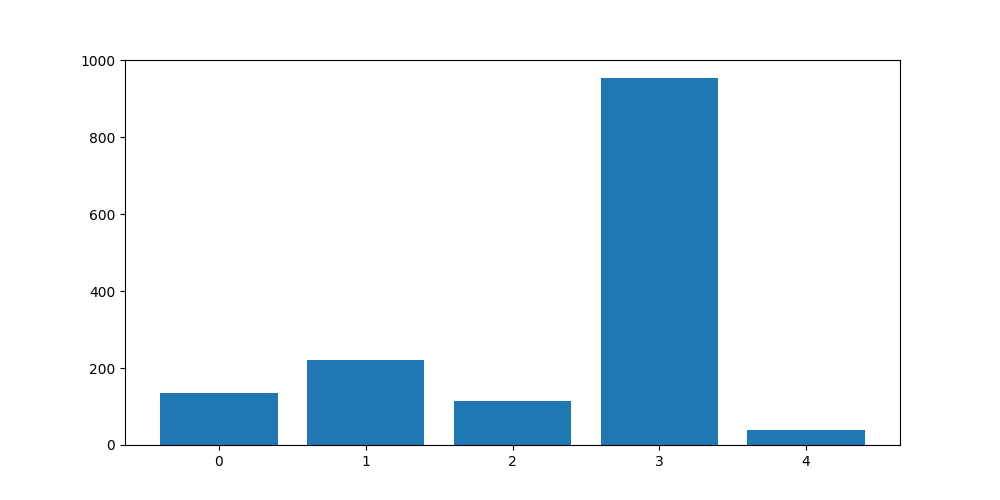

--- Values repartition after cleaning ---
0 : 134 ( 9.2 %)
1 : 221 ( 15.1 %)
2 : 114 ( 7.8 %)
3 : 991 ( 67.9 %)




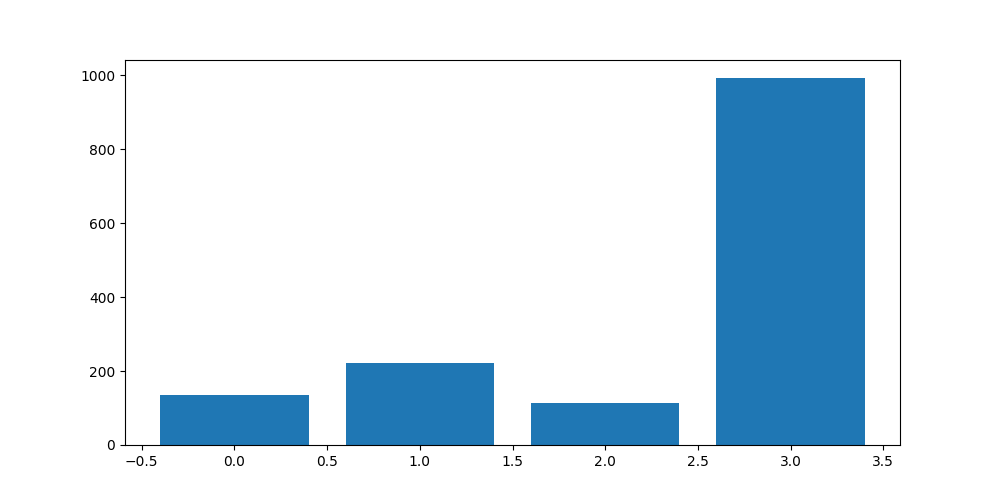

['No' 'Gd' 'Mn' 'No' 'Av' 'No' 'Av' 'Mn' 'No' 'No']
[3 0 2 3 1 3 1 2 3 3]


In [451]:
#BsmtExposure
BsmtExposure = data[:,32].copy()
BsmtExposure_mapping = {"Gd": 0, "Av": 1, "Mn": 2, "No": 3, "NA": 4}
BsmtExposure = np.array([BsmtExposure_mapping[exposure] for exposure in BsmtExposure])

printRepartion(BsmtExposure, list(BsmtExposure_mapping.values()))
plotRepartition(BsmtExposure, list(BsmtExposure_mapping.values()))

#TO CHECK : does it make sense to have a gradation with NA in it ?

#3 <= [3,4]
BsmtExposure[BsmtExposure == 4] = 3
BsmtExposure_mapping = {"Gd": 0, "Av": 1, "Mn": 2, "No, NA": 3}

printRepartion(BsmtExposure, list(BsmtExposure_mapping.values()), "after cleaning")
plotRepartition(BsmtExposure, list(BsmtExposure_mapping.values()))

print(data[:10, 32])
print(BsmtExposure[:10])

--- Values repartition  ---
0 : 418 ( 28.6 %)
1 : 220 ( 15.1 %)
2 : 148 ( 10.1 %)
3 : 133 ( 9.1 %)
4 : 74 ( 5.1 %)
5 : 430 ( 29.5 %)
6 : 37 ( 2.5 %)




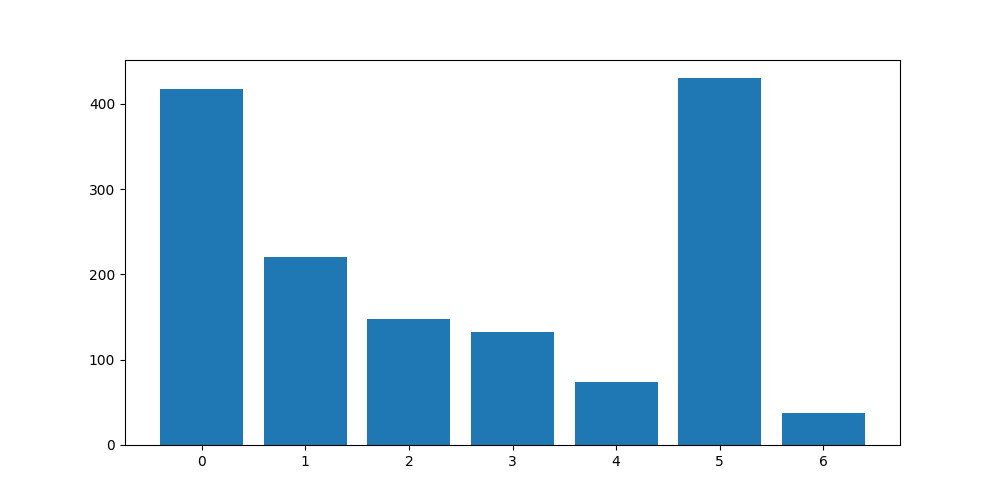

--- Values repartition after cleaning ---
0 : 418 ( 28.6 %)
1 : 220 ( 15.1 %)
2 : 148 ( 10.1 %)
3 : 133 ( 9.1 %)
4 : 74 ( 5.1 %)
5 : 467 ( 32.0 %)




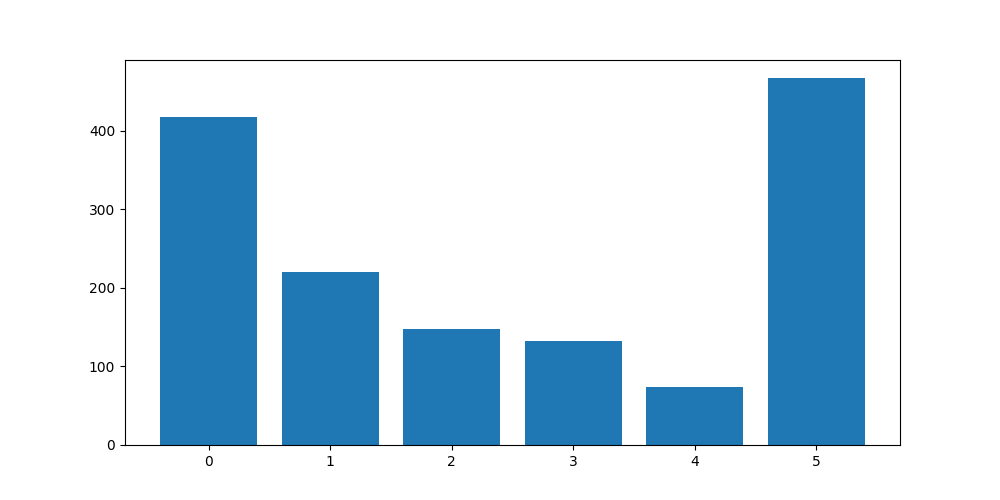

['GLQ' 'ALQ' 'GLQ' 'ALQ' 'GLQ' 'GLQ' 'GLQ' 'ALQ' 'Unf' 'GLQ']
[0 1 0 1 0 0 0 1 5 0]


In [455]:
#BsmtFinType1
BsmtFinType1 = data[:,33].copy()
BsmtFinType1_mapping = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3
                        , "LwQ": 4, "Unf": 5, "NA": 6}
BsmtFinType1 = np.array([BsmtFinType1_mapping[finType] for finType in BsmtFinType1])

printRepartion(BsmtFinType1, list(BsmtFinType1_mapping.values()))
plotRepartition(BsmtFinType1, list(BsmtFinType1_mapping.values()))

#TO CHECK : should we group more ?

#5 <= [5, 6]
BsmtFinType1[BsmtFinType1 == 6] = 5
BsmtFinType1_mapping = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3
                        , "LwQ": 4, "Unf, NA": 5}

printRepartion(BsmtFinType1, list(BsmtFinType1_mapping.values()), "after cleaning")
plotRepartition(BsmtFinType1, list(BsmtFinType1_mapping.values()))


print(data[:10, 33])
print(BsmtFinType1[:10])

In [456]:
#BsmtFinSF1
BsmtFinSF1 = data[:,34].copy().astype(float)
print(BsmtFinSF1[:10])

[ 706.  978.  486.  216.  655.  732. 1369.  859.    0.  851.]


--- Values repartition  ---
0 : 14 ( 1.0 %)
1 : 19 ( 1.3 %)
2 : 33 ( 2.3 %)
3 : 54 ( 3.7 %)
4 : 46 ( 3.2 %)
5 : 1256 ( 86.0 %)
6 : 38 ( 2.6 %)




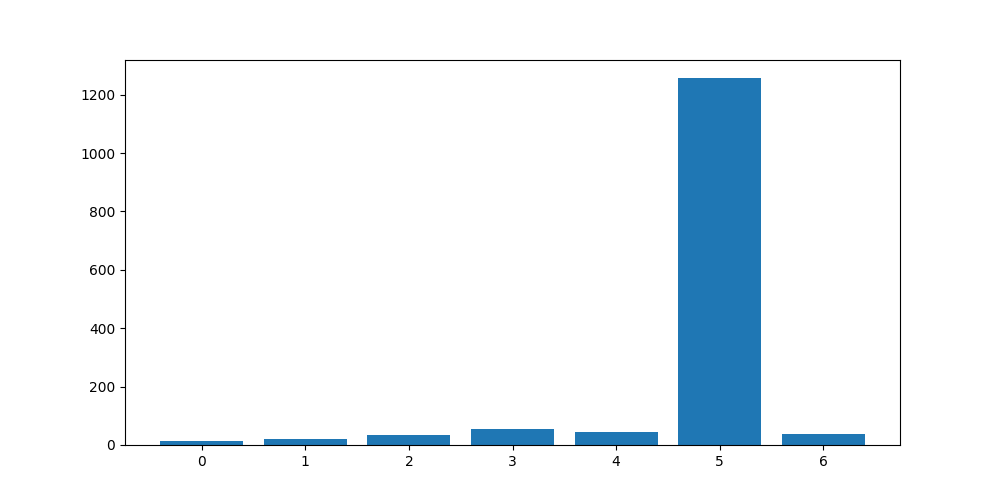

--- Values repartition after cleaning ---
0 : 166 ( 11.4 %)
1 : 1294 ( 88.6 %)




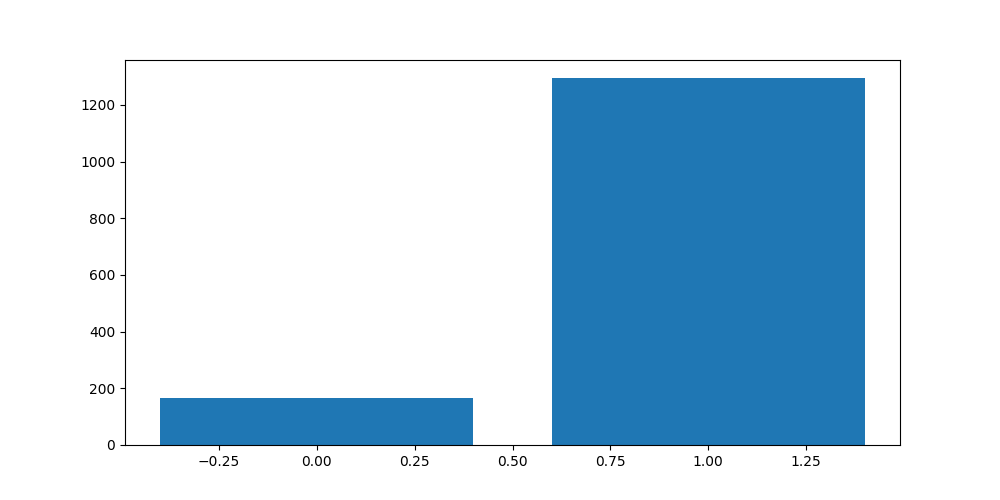

In [460]:
#BsmtFinType2
BsmtFinType2 = data[:,35].copy()
BsmtFinType2_mapping = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4, "Unf": 5, "NA": 6}
BsmtFinType2 = np.array([BsmtFinType2_mapping[finType] for finType in BsmtFinType2])
printRepartion(BsmtFinType2, list(BsmtFinType2_mapping.values()))
plotRepartition(BsmtFinType2, list(BsmtFinType2_mapping.values()))

#0 <= [0:4] and 1 <= [5, 6]
BsmtFinType2[BsmtFinType2 <= 4] = 0
BsmtFinType2[BsmtFinType2 > 4] = 1
BsmtFinType2_mapping = {"GLQ, ALQ, BLQ, Rec, LwQ": 0, "Unf, NA": 1}

printRepartion(BsmtFinType2, list(BsmtFinType2_mapping.values()), "after cleaning")
plotRepartition(BsmtFinType2, list(BsmtFinType2_mapping.values()))


In [462]:
#BsmtFinSF2
BsmtFinSF2 = data[:,36].copy().astype(float)
print(BsmtFinSF2[:10])

[ 0.  0.  0.  0.  0.  0.  0. 32.  0.  0.]


In [463]:
#BsmtUnfSF
BsmtUnfSF = data[:,37].copy().astype(float)
print(BsmtUnfSF[:10])

[150. 284. 434. 540. 490.  64. 317. 216. 952. 140.]


In [464]:
#TotalBsmtSF
TotalBsmtSF = data[:,38].copy().astype(float)
print(TotalBsmtSF[:10])

[ 856. 1262.  920.  756. 1145.  796. 1686. 1107.  952.  991.]


--- Values repartition  ---
Floor : 1 ( 0.1 %)
GasA : 1428 ( 97.8 %)
GasW : 18 ( 1.2 %)
Grav : 7 ( 0.5 %)
OthW : 2 ( 0.1 %)
Wall : 4 ( 0.3 %)




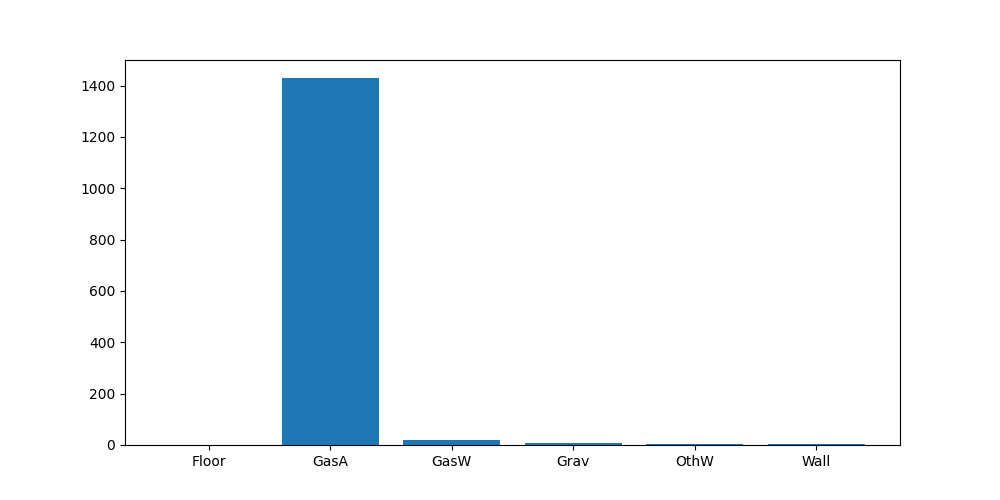

In [466]:
#TO IGNORE : GasA is ultra majoritary

#Heating
Heating = data[:,39]
uniqueHeating = np.array(["Floor", "GasA", "GasW", "Grav", "OthW", "Wall"])

printRepartion(Heating, uniqueHeating)
plotRepartition(Heating, uniqueHeating)

# oneHotEncodedHeating = oneHotEncode(Heating, uniqueHeating)
# print(oneHotEncodedHeating[:10])
# print(Heating[Heating == "Wall"])


--- Values repartition  ---
0 : 741 ( 50.8 %)
1 : 241 ( 16.5 %)
2 : 428 ( 29.3 %)
3 : 49 ( 3.4 %)
4 : 1 ( 0.1 %)




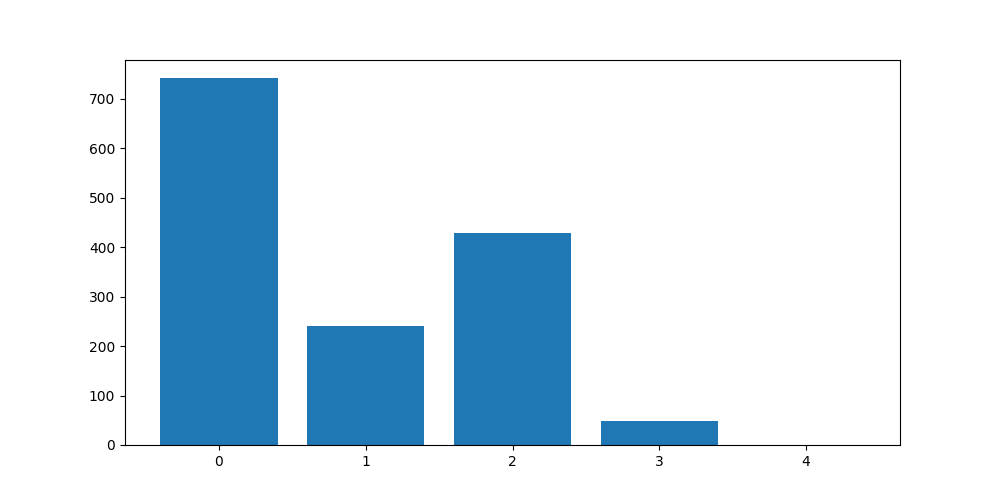

--- Values repartition after cleaning ---
0 : 741 ( 50.8 %)
1 : 241 ( 16.5 %)
2 : 478 ( 32.7 %)




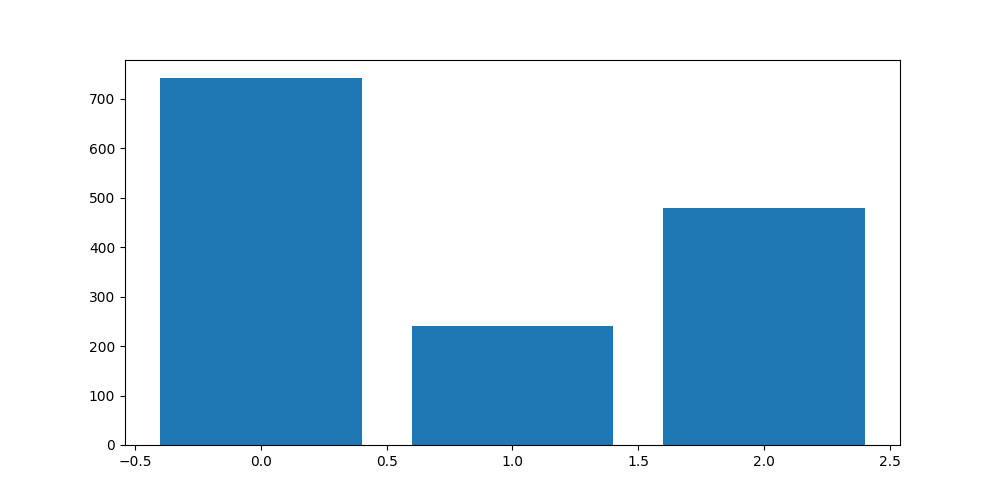

['Ex' 'Ex' 'Ex' 'Gd' 'Ex' 'Ex' 'Ex' 'Ex' 'Gd' 'Ex']
[0 0 0 1 0 0 0 0 1 0]


In [469]:
#HeatingQC
HeatingQC = data[:,40].copy()
heatingqc_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4} #group Po with Fa because of low number of Po and Fa
HeatingQC = np.array([heatingqc_mapping[qual] for qual in HeatingQC])

printRepartion(HeatingQC, list(heatingqc_mapping.values()))
plotRepartition(HeatingQC, list(heatingqc_mapping.values()))

#2 <= [2, 3, 4]
HeatingQC[HeatingQC > 1] = 2
heatingqc_mapping = {"Ex": 0, "Gd": 1, "TA, Fa, Po": 2}

printRepartion(HeatingQC, list(heatingqc_mapping.values()), "after cleaning")
plotRepartition(HeatingQC, list(heatingqc_mapping.values()))

print(data[:10, 40])
print(HeatingQC[:10])

--- Values repartition  ---
N : 95 ( 6.5 %)
Y : 1365 ( 93.5 %)




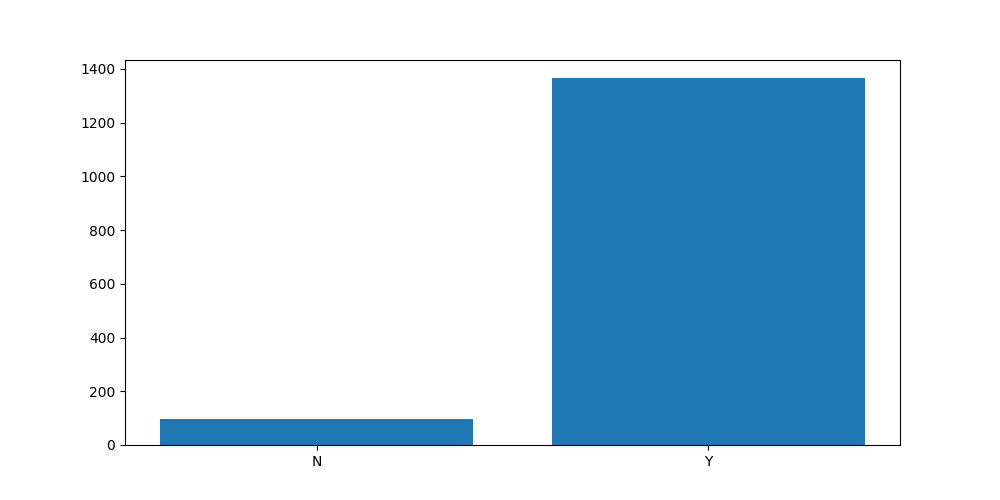

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [471]:
#CentralAir
CentralAir = data[:,41].copy()
uniqueCentralAir = np.array(["N", "Y"])

printRepartion(CentralAir, uniqueCentralAir)
plotRepartition(CentralAir, uniqueCentralAir)

oneHotEncodedCentralAir = oneHotEncode(CentralAir, uniqueCentralAir)
print(oneHotEncodedCentralAir[:10])

--- Values repartition  ---
SBrkr : 1334 ( 91.4 %)
FuseA : 94 ( 6.4 %)
FuseF : 27 ( 1.8 %)
FuseP : 3 ( 0.2 %)
Mix : 1 ( 0.1 %)




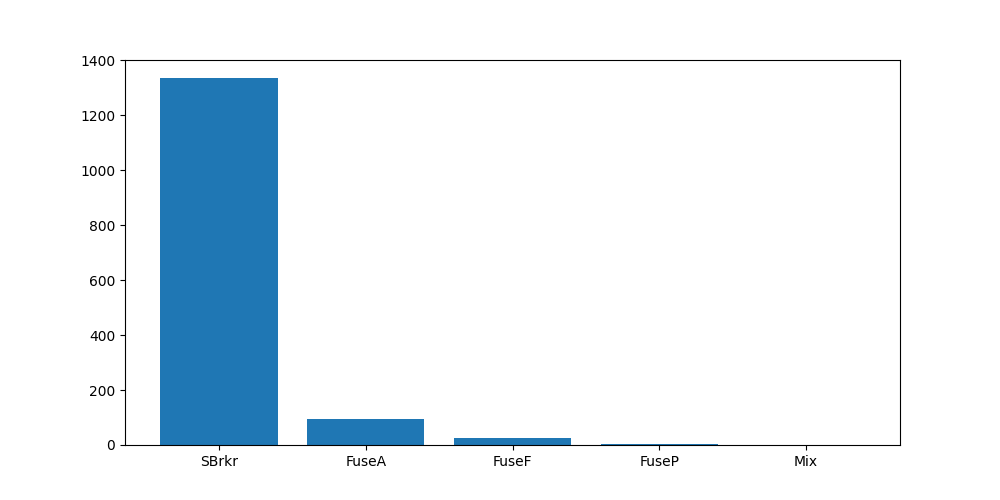

--- Values repartition after cleaning ---
SBrkr : 1334 ( 91.4 %)
Fuse : 126 ( 8.6 %)




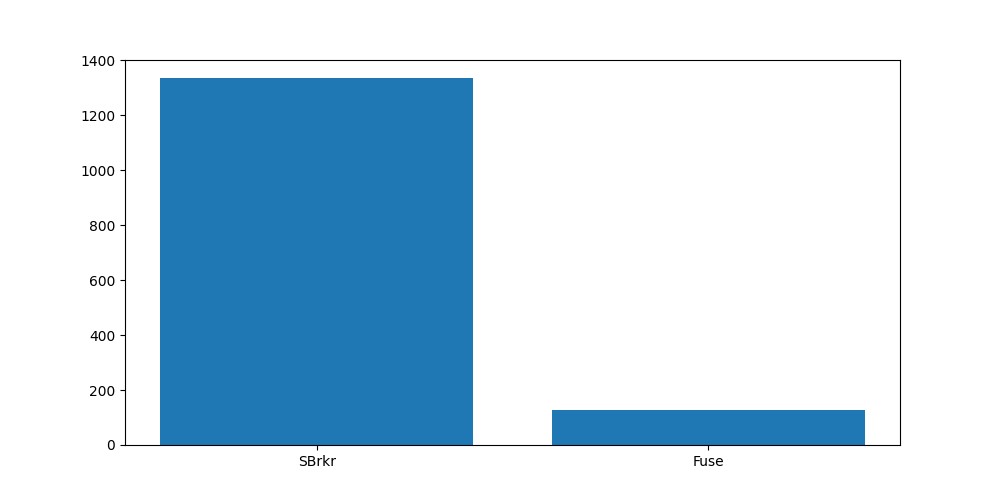

In [474]:
#Electrical
Electrical = data[:,42].copy()
uniqueElectrical = np.array(["SBrkr", "FuseA", "FuseF", "FuseP", "Mix"])

printRepartion(Electrical, uniqueElectrical)
plotRepartition(Electrical, uniqueElectrical)

#we only keep SBrkr and others are grouped in Fuse
Electrical[Electrical != "SBrkr"] = "Fuse"
uniqueElectrical = np.array(["SBrkr", "Fuse"])

printRepartion(Electrical, uniqueElectrical, "after cleaning")
plotRepartition(Electrical, uniqueElectrical)





In [475]:
#1stFlrSF
FirstFlrSF = data[:,43].copy().astype(float)
print(FirstFlrSF[:10])

[ 856. 1262.  920.  961. 1145.  796. 1694. 1107. 1022. 1077.]


In [476]:
#2ndFlrSF
SecondFlrSF = data[:,44].copy().astype(float)
print(SecondFlrSF[:10])

[ 854.    0.  866.  756. 1053.  566.    0.  983.  752.    0.]


In [479]:
#LowQualFinSF
LowQualFinSF = data[:,45].copy().astype(float)
print(LowQualFinSF[:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [480]:
#GrLivArea
GrLivArea = data[:,46].copy().astype(float)
print(GrLivArea[:10])

[1710. 1262. 1786. 1717. 2198. 1362. 1694. 2090. 1774. 1077.]


In [482]:
#BsmtFullBath
BsmtFullBath = data[:,47].copy().astype(float)
print(BsmtFullBath[:100])

[1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 2. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1.]


In [483]:
#BsmtHalfBath
BsmtHalfBath = data[:,48].copy().astype(float)
print(BsmtHalfBath[:100])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]


In [484]:
#FullBath
FullBath = data[:,49].copy().astype(float)
print(FullBath[:100])

[2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 3. 1. 2. 1. 1. 1. 2. 1. 1. 3. 1. 2. 1.
 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 3. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2.
 2. 1. 2. 1. 1. 0. 1. 2. 2. 2. 3. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1.
 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 1. 1. 1.]


In [485]:
#HalfBath
HalfBath = data[:,50].copy().astype(float)
print(HalfBath[:100])

[1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1.]


In [486]:
#Bedromm 
Bedroom = data[:,51].copy().astype(float)
print(Bedroom[:100])

[3. 3. 3. 3. 4. 1. 3. 3. 2. 2. 3. 4. 2. 3. 2. 2. 2. 2. 3. 3. 4. 3. 3. 3.
 3. 3. 3. 3. 2. 1. 3. 3. 3. 4. 2. 4. 3. 3. 3. 2. 3. 2. 2. 3. 3. 2. 1. 3.
 2. 3. 3. 3. 2. 0. 3. 3. 3. 3. 3. 2. 3. 3. 2. 3. 3. 4. 3. 3. 2. 3. 3. 2.
 3. 3. 3. 2. 2. 2. 4. 2. 4. 2. 3. 3. 3. 4. 3. 2. 2. 3. 2. 2. 2. 4. 3. 3.
 3. 3. 2. 3.]


In [487]:
#Kitchen
Kitchen = data[:,52].copy().astype(float)
print(Kitchen[:100])

[1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1.]


--- Values repartition  ---
0 : 100 ( 6.8 %)
1 : 586 ( 40.1 %)
2 : 735 ( 50.3 %)
3 : 39 ( 2.7 %)
4 : 0 ( 0.0 %)




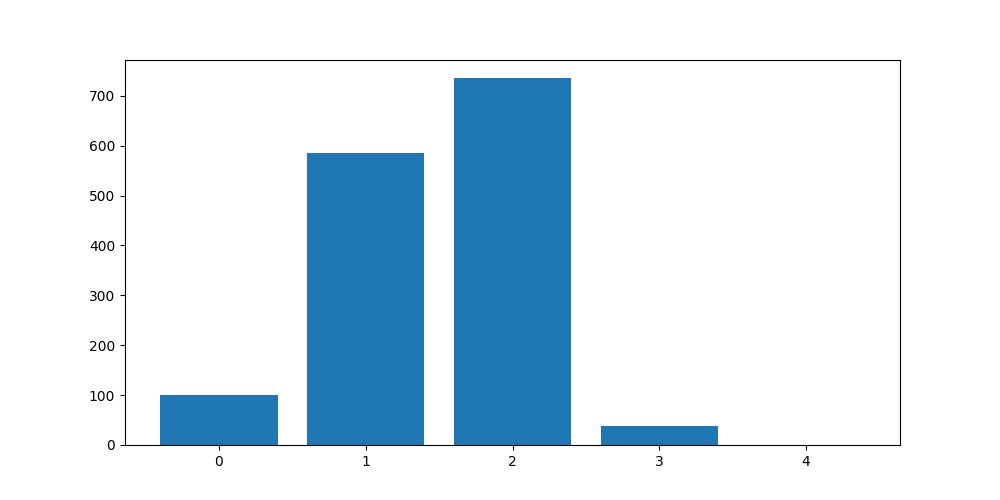

--- Values repartition after cleaning ---
0 : 686 ( 47.0 %)
1 : 774 ( 53.0 %)




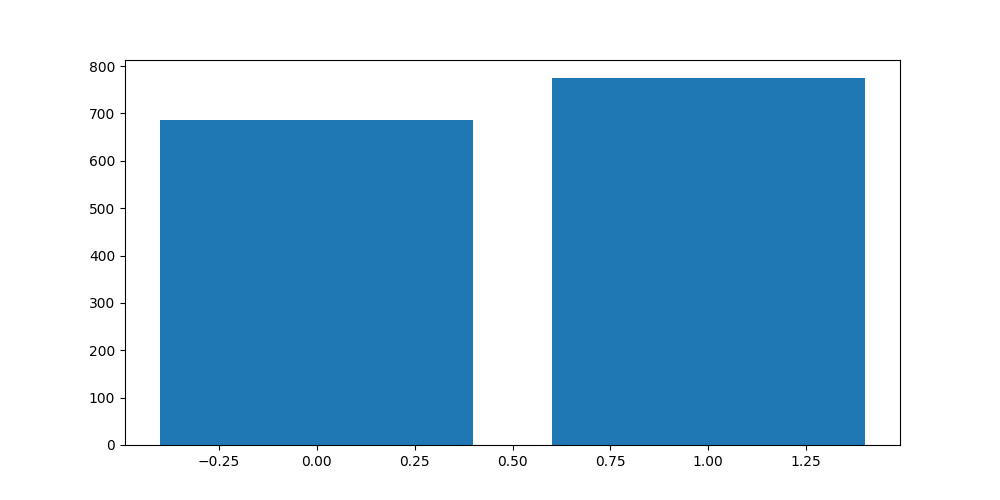

In [489]:
#KitchenQual
KitchenQual = data[:,53].copy()
kitchenqual_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4}
KitchenQual = np.array([kitchenqual_mapping[qual] for qual in KitchenQual])

printRepartion(KitchenQual, list(kitchenqual_mapping.values()))
plotRepartition(KitchenQual, list(kitchenqual_mapping.values()))

#0 <= [0, 1] and 1 <= [2, 3, 4]
KitchenQual[KitchenQual <= 1] = 0
KitchenQual[KitchenQual > 1] = 1
kitchenqual_mapping = {"Ex, Gd": 0, "TA, Fa, Po": 1}

printRepartion(KitchenQual, list(kitchenqual_mapping.values()), "after cleaning")
plotRepartition(KitchenQual, list(kitchenqual_mapping.values()))

In [490]:
#TotRmsAbvGrd
TotRmsAbvGrd = data[:,54].copy().astype(float)
print(TotRmsAbvGrd[:100])

[ 8.  6.  6.  7.  9.  5.  7.  7.  8.  5.  5. 11.  4.  7.  5.  5.  5.  6.
  6.  6.  9.  6.  7.  6.  6.  7.  5.  7.  6.  4.  6.  6.  7.  6.  6.  9.
  6.  5.  5.  6.  6.  5.  5.  5.  6.  6.  6.  7.  8.  6.  6.  6.  5.  5.
  6.  7.  7.  7. 10.  4.  5.  6.  6.  9.  8.  9.  7.  7.  4.  7.  8.  4.
  7.  6.  8.  5.  4.  6.  8.  5.  8.  5.  6.  6.  7.  9.  6.  4.  6.  5.
  4.  6.  5.  9.  7.  6.  6.  6.  5.  6.]


--- Values repartition  ---
0 : 1360 ( 93.2 %)
1 : 31 ( 2.1 %)
2 : 34 ( 2.3 %)
3 : 15 ( 1.0 %)
4 : 14 ( 1.0 %)
5 : 5 ( 0.3 %)
6 : 1 ( 0.1 %)
7 : 0 ( 0.0 %)




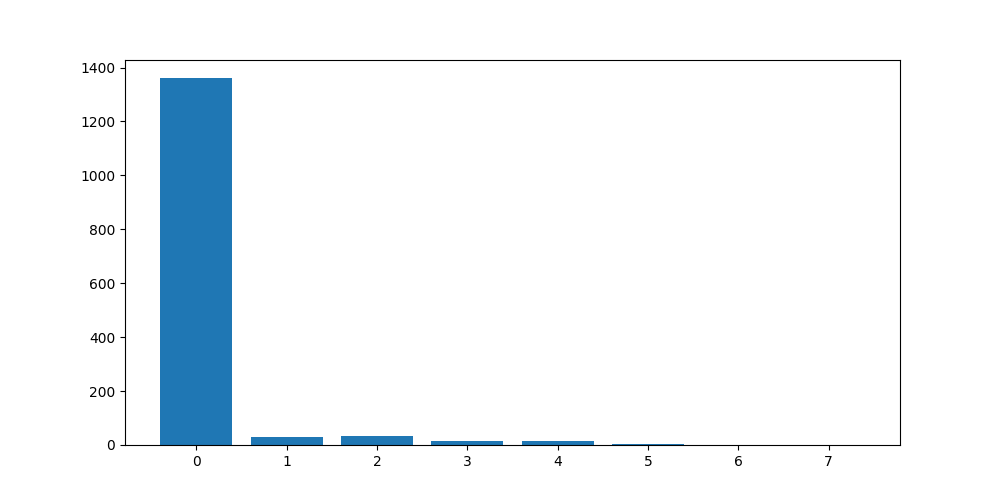

--- Values repartition after cleaning ---
0 : 1360 ( 93.2 %)
1 : 100 ( 6.8 %)




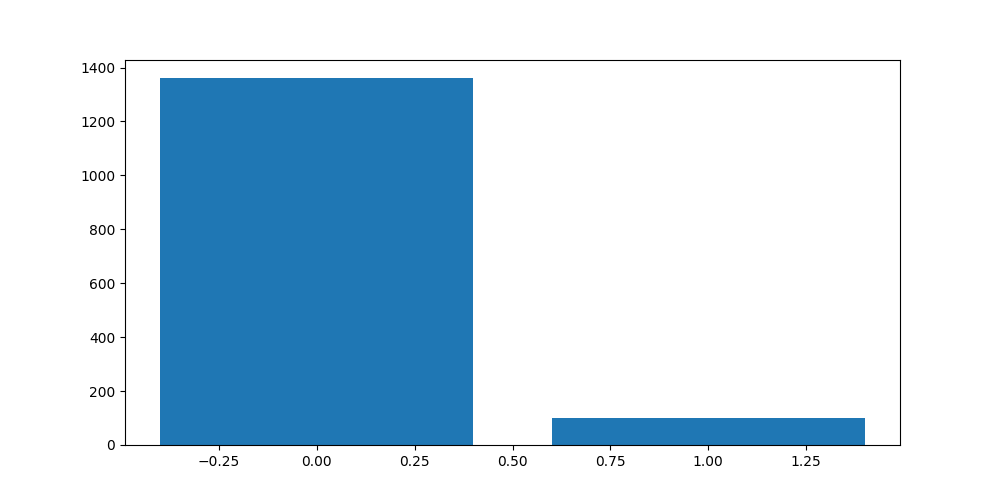

In [493]:
#Functional
Functional = data[:,55].copy()
functional_mapping = {"Typ": 0, "Min1": 1, "Min2": 2, "Mod": 3, 
                      "Maj1": 4, "Maj2": 5, "Sev": 6, "Sal": 7}

Functional = np.array([functional_mapping[func] for func in Functional])

printRepartion(Functional, list(functional_mapping.values()))
plotRepartition(Functional, list(functional_mapping.values()))

#we only keep Typ and others are grouped in "other"
Functional[Functional != 0] = 1
functional_mapping = {"Typ": 0, "other": 1}

printRepartion(Functional, list(functional_mapping.values()), "after cleaning")
plotRepartition(Functional, list(functional_mapping.values()))



In [494]:
#Fireplaces
Fireplaces = data[:,56].copy().astype(float)
print(Fireplaces[:100])

[0. 1. 1. 1. 1. 0. 1. 2. 2. 2. 0. 2. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 2. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 2. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 2. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0.]


--- Values repartition  ---
0 : 24 ( 1.6 %)
1 : 380 ( 26.0 %)
2 : 313 ( 21.4 %)
3 : 33 ( 2.3 %)
4 : 20 ( 1.4 %)
5 : 690 ( 47.3 %)




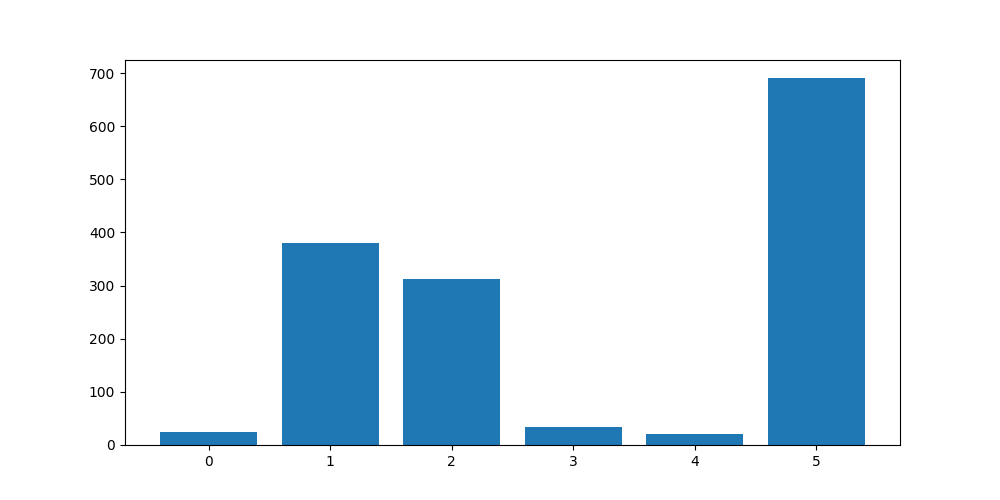

--- Values repartition after cleaning ---
0 : 404 ( 27.7 %)
1 : 313 ( 21.4 %)
2 : 743 ( 50.9 %)




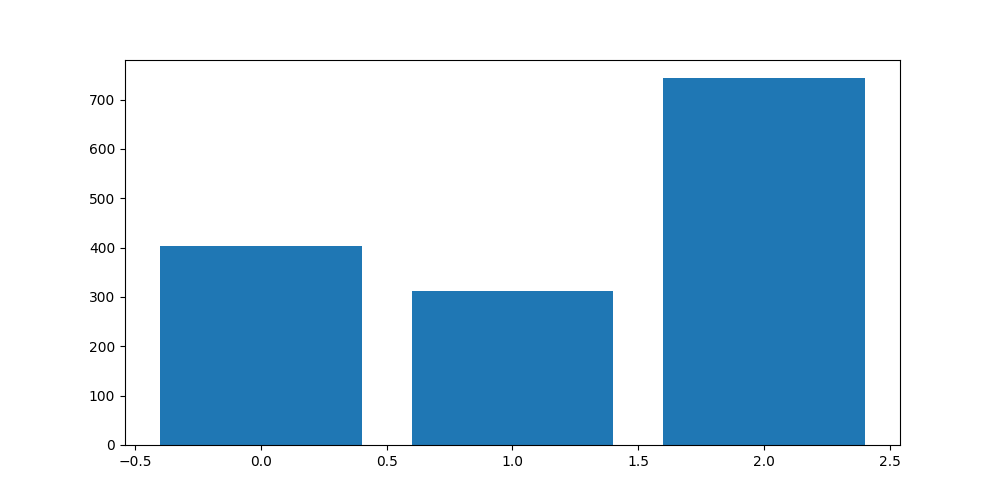

[[0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [501]:
#FireplaceQu
FireplaceQu = data[:,57].copy()
fireplacequ_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "NA": 5}
FireplaceQu = np.array([fireplacequ_mapping[qual] for qual in FireplaceQu])

printRepartion(FireplaceQu, list(fireplacequ_mapping.values()))
plotRepartition(FireplaceQu, list(fireplacequ_mapping.values()))

#0 <= [0, 1] and 1 <= [2] and 2 <= [3, 4, 5]
FireplaceQu[FireplaceQu <= 1] = 0
FireplaceQu[FireplaceQu == 2] = 1
FireplaceQu[FireplaceQu > 2] = 2
fireplacequ_mapping = {"Ex, Gd": 0, "TA": 1, "Fa, Po, NA": 2}


printRepartion(FireplaceQu, list(fireplacequ_mapping.values()), "after cleaning")
plotRepartition(FireplaceQu, list(fireplacequ_mapping.values()))

oneHotEncodedFireplaceQu = oneHotEncode(FireplaceQu, list(fireplacequ_mapping.values()))
print(oneHotEncodedFireplaceQu[:10])



--- Values repartition  ---
2Types : 6 ( 0.4 %)
Attchd : 870 ( 59.6 %)
Basment : 19 ( 1.3 %)
BuiltIn : 88 ( 6.0 %)
CarPort : 9 ( 0.6 %)
Detchd : 387 ( 26.5 %)




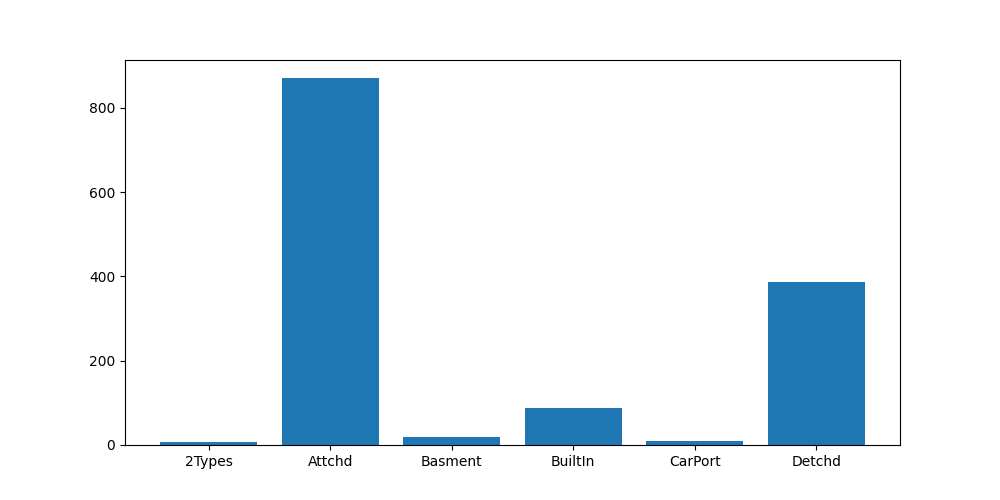

--- Values repartition after cleaning ---
Attchd : 870 ( 59.6 %)
Detchd : 387 ( 26.5 %)
BuiltIn : 88 ( 6.0 %)
other : 115 ( 7.9 %)




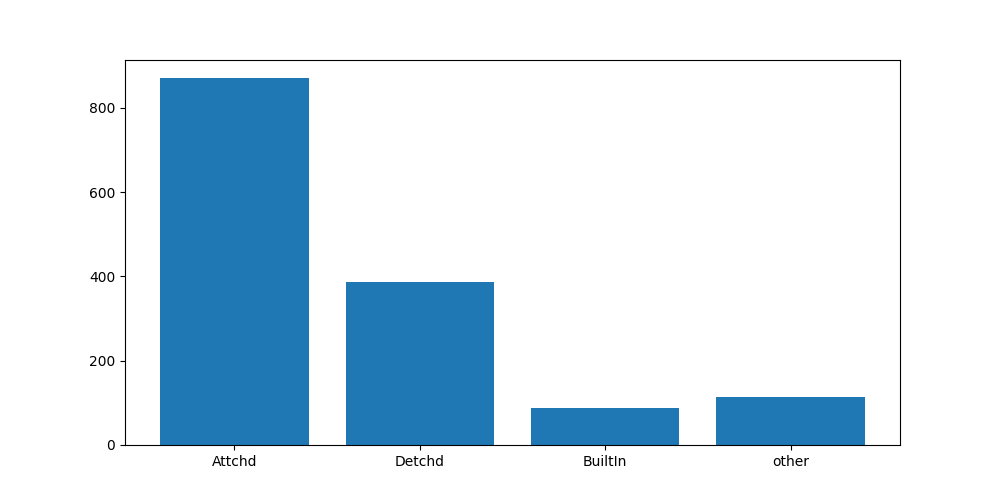

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]


In [502]:
#GarageType
GarageType = data[:,58].copy()
uniqueGarageType = np.array(["2Types", "Attchd", "Basment", "BuiltIn", 
                             "CarPort", "Detchd"])

printRepartion(GarageType, uniqueGarageType)
plotRepartition(GarageType, uniqueGarageType)

#we only keep Attchd, Detchd, BuiltIn and others are grouped in "other"
GarageType[~np.isin(GarageType,  ["Attchd", "Detchd", "BuiltIn"])] = "other"
uniqueGarageType = np.array(["Attchd", "Detchd", "BuiltIn", "other"])

printRepartion(GarageType, uniqueGarageType, "after cleaning")
plotRepartition(GarageType, uniqueGarageType)

oneHotEncodedGarageType = oneHotEncode(GarageType, uniqueGarageType)
print(oneHotEncodedGarageType[:10])

In [507]:
#GarageYrBlt
GarageYrBlt = data[:,59].copy()
GarageYrBlt[GarageYrBlt == "NA"] = np.nan
GarageYrBlt = GarageYrBlt.astype(float)

delta_YearSold_GarageYrBlt = YearSold - GarageYrBlt

print(GarageYrBlt[:100])
print(delta_YearSold_GarageYrBlt[:100])

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 2004. 1958. 2005. 1930. 2002. 1976.
 1968. 2007. 2005. 2008. 1957. 1920. 1920. 1966. 2007. 1959. 2005. 2004.
 1995. 1954. 1953.   nan 1965. 1959. 1983. 1977. 1959. 2005. 2003. 2006.
   nan 1966. 1997. 1985. 1963. 1981. 1962. 1964. 1999. 2004. 2006. 1973.
 2006. 1935. 2006. 1990. 1998. 2004. 1970. 2003. 1945. 1953. 1973. 1987.
 1998. 1989. 1915. 1973. 1956. 1948.   nan 1966. 1968. 1998. 2007. 1974.
 1995. 1991. 2005. 2009.   nan   nan 1950. 1961. 1921. 1900. 1997. 1993.
 1999. 1965. 1920.   nan]
[  5.  31.   7.   8.   8.  16.   3.  36.  77.  69.  43.   1.  46.   1.
  48.  16.  40.  39.   4.  51.   1.  77.   6.  31.  42.   2.   5.   2.
  49.  88.  88.  42.   1.  51.   2.   2.  14.  55.  57.  nan  41.  48.
  24.  31.  47.   5.   6.   1.  nan  41.  10.  21.  47.  25.  45.  44.
  10.   2.   0.  35.   0.  72.   1.  20.  11.   3.  40.   4.  65.  53.
  34.  20.  11.  21.  95.  36.  52.

--- Values repartition  ---
0 : 352 ( 24.1 %)
1 : 422 ( 28.9 %)
2 : 605 ( 41.4 %)
3 : 81 ( 5.5 %)




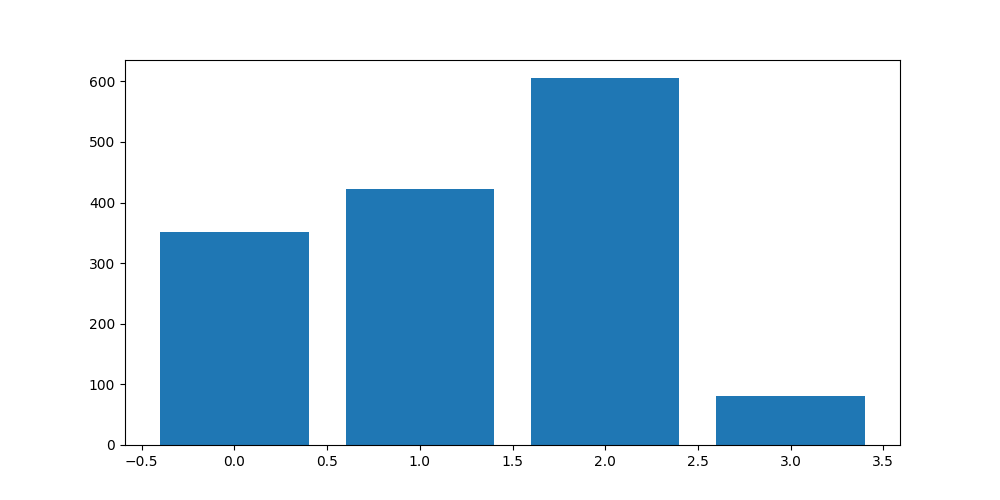

In [508]:
#GarageFinish
GarageFinish = data[:,60].copy()
garagefinish_mapping = {"Fin": 0, "RFn": 1, "Unf": 2, "NA": 3}
GarageFinish = np.array([garagefinish_mapping[finish] for finish in GarageFinish])

printRepartion(GarageFinish, list(garagefinish_mapping.values()))
plotRepartition(GarageFinish, list(garagefinish_mapping.values()))

In [509]:
#GarageCars
GarageCars = data[:,61].copy().astype(float)
print(GarageCars[:100])

[2. 2. 2. 3. 3. 2. 2. 2. 2. 1. 1. 3. 1. 3. 1. 2. 2. 2. 2. 1. 3. 1. 2. 2.
 1. 3. 2. 3. 1. 1. 1. 1. 2. 2. 2. 3. 2. 2. 1. 0. 2. 1. 2. 1. 1. 2. 2. 3.
 0. 1. 2. 2. 2. 3. 2. 2. 2. 2. 3. 1. 2. 1. 2. 2. 2. 3. 2. 2. 1. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 0. 2. 1. 2. 3. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2.
 2. 1. 1. 0.]


In [510]:
#GarageArea
GarageArea = data[:,62].copy().astype(float)
print(GarageArea[:100])

[548. 460. 608. 642. 836. 480. 636. 484. 468. 205. 384. 736. 352. 840.
 352. 576. 480. 516. 576. 294. 853. 280. 534. 572. 270. 890. 576. 772.
 319. 240. 250. 271. 484. 447. 556. 691. 672. 498. 246.   0. 440. 308.
 504. 308. 300. 576. 670. 826.   0. 386. 388. 528. 516. 894. 572. 576.
 480. 565. 641. 352. 576. 288. 484. 480. 645. 852. 576. 558. 220. 667.
 516. 360. 427. 490. 379. 297. 283. 240.   0. 440. 509. 405. 758. 461.
 400. 462. 400. 528.   0.   0. 420. 480. 432. 506. 684. 420. 472. 432.
 366.   0.]


--- Values repartition  ---
0 : 3 ( 0.2 %)
1 : 14 ( 1.0 %)
2 : 1311 ( 89.8 %)
3 : 48 ( 3.3 %)
4 : 3 ( 0.2 %)
5 : 81 ( 5.5 %)




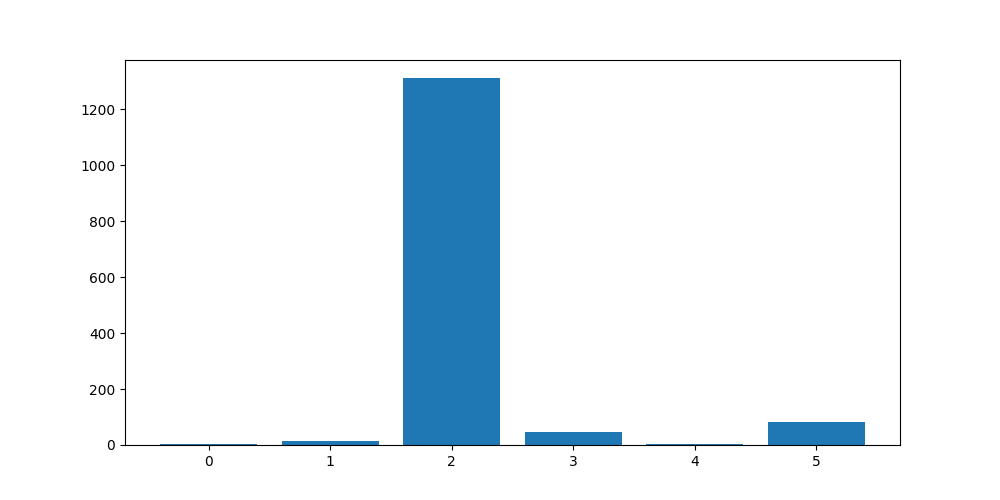

--- Values repartition after cleaning ---
0 : 1328 ( 91.0 %)
1 : 132 ( 9.0 %)




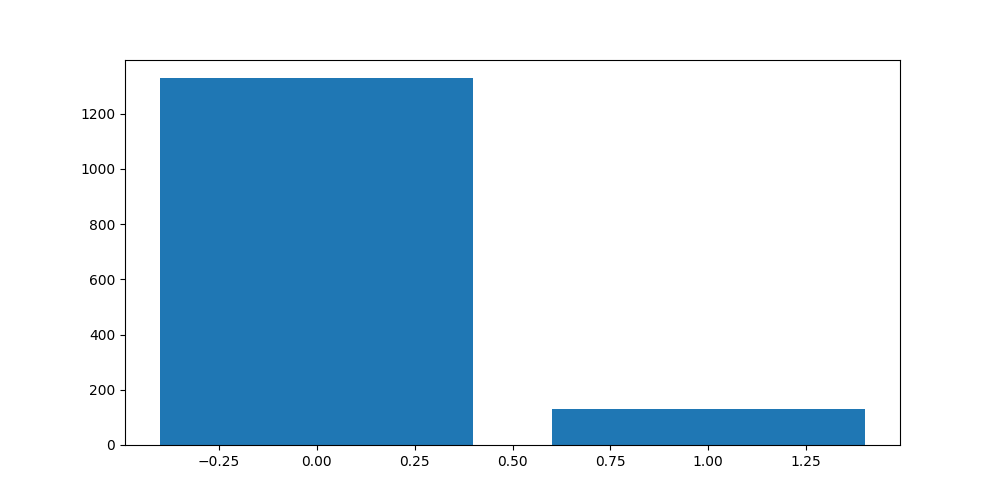

In [512]:
#GarageQual
GarageQual = data[:,63].copy()
garagequal_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "NA": 5}
GarageQual = np.array([garagequal_mapping[qual] for qual in GarageQual])

printRepartion(GarageQual, list(garagequal_mapping.values()))
plotRepartition(GarageQual, list(garagequal_mapping.values()))

#0 <= [0, 1, 2] and 1 <= [3, 4, 5]
GarageQual[GarageQual <= 2] = 0
GarageQual[GarageQual > 2] = 1
garagequal_mapping = {"Ex, Gd, TA": 0, "Fa, Po, NA": 1}

printRepartion(GarageQual, list(garagequal_mapping.values()), "after cleaning")
plotRepartition(GarageQual, list(garagequal_mapping.values()))

--- Values repartition  ---
0 : 2 ( 0.1 %)
1 : 9 ( 0.6 %)
2 : 1326 ( 90.8 %)
3 : 35 ( 2.4 %)
4 : 7 ( 0.5 %)
5 : 81 ( 5.5 %)




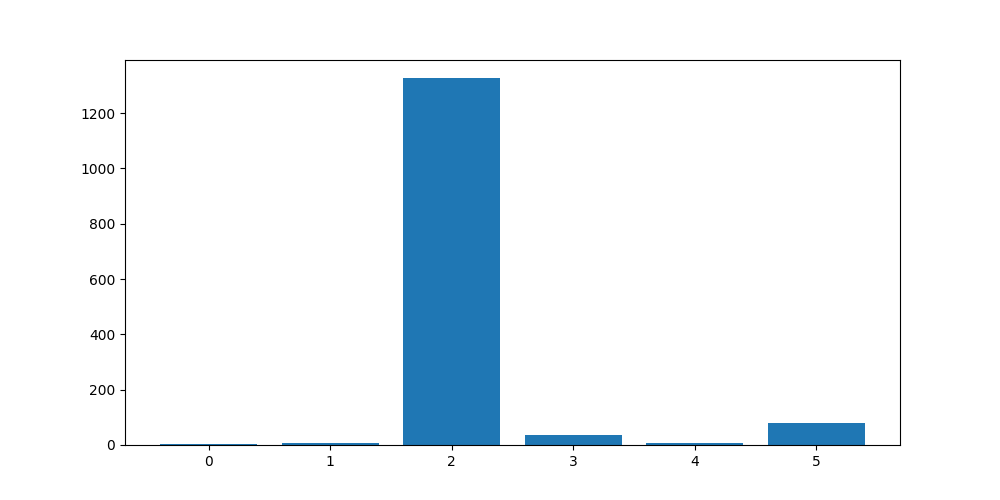

--- Values repartition after cleaning ---
0 : 1337 ( 91.6 %)
1 : 123 ( 8.4 %)




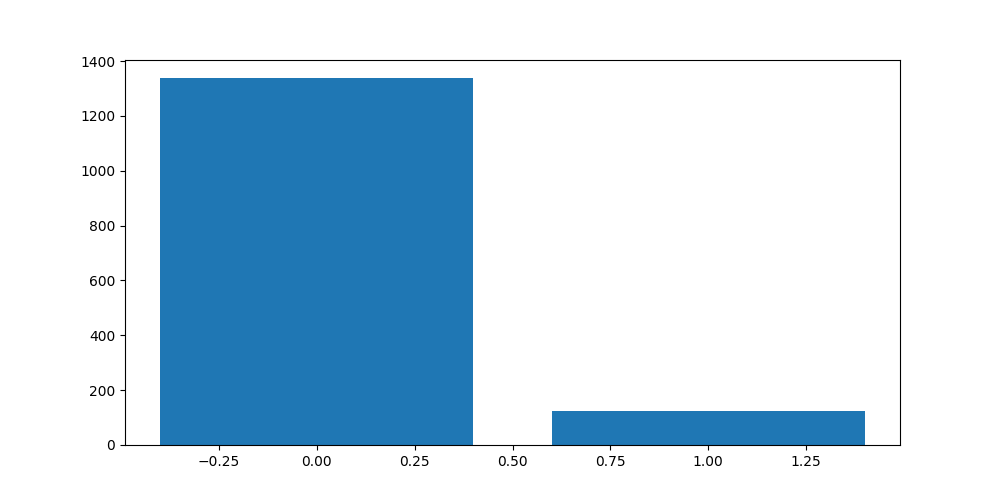

In [514]:
#GarageCond
GarageCond = data[:,64].copy()
garagecond_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "NA": 5}
GarageCond = np.array([garagecond_mapping[cond] for cond in GarageCond])

printRepartion(GarageCond, list(garagecond_mapping.values()))
plotRepartition(GarageCond, list(garagecond_mapping.values()))

#0 <= [0, 1, 2] and 1 <= [3, 4, 5]
GarageCond[GarageCond <= 2] = 0
GarageCond[GarageCond > 2] = 1
garagecond_mapping = {"Ex, Gd, TA": 0, "Fa, Po, NA": 1}

printRepartion(GarageCond, list(garagecond_mapping.values()), "after cleaning")
plotRepartition(GarageCond, list(garagecond_mapping.values()))

--- Values repartition  ---
0 : 1340 ( 91.8 %)
1 : 30 ( 2.1 %)
2 : 90 ( 6.2 %)




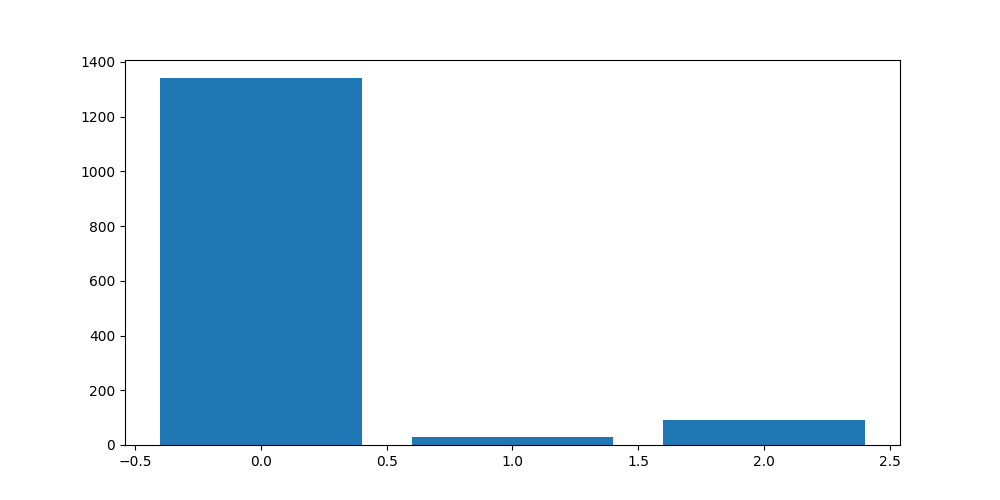

--- Values repartition after cleaning ---
0 : 1340 ( 91.8 %)
1 : 120 ( 8.2 %)




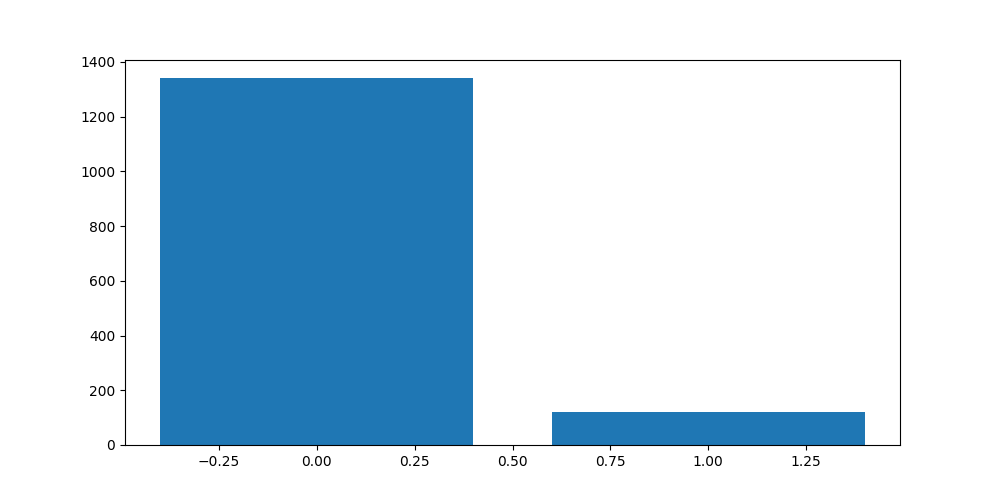

In [516]:
#PavedDrive
PavedDrive = data[:,65].copy()
paveddrive_mapping = {"Y": 0, "P": 1, "N": 2}
PavedDrive = np.array([paveddrive_mapping[drive] for drive in PavedDrive])

printRepartion(PavedDrive, list(paveddrive_mapping.values()))
plotRepartition(PavedDrive, list(paveddrive_mapping.values()))

#1 <= [1, 2]
PavedDrive[PavedDrive > 0] = 1
paveddrive_mapping = {"Y": 0, "P, N": 1}

printRepartion(PavedDrive, list(paveddrive_mapping.values()), "after cleaning")
plotRepartition(PavedDrive, list(paveddrive_mapping.values()))


In [517]:
#WoodDeckSF
WoodDeckSF = data[:,66].copy().astype(float)
print(WoodDeckSF[:100])

[  0. 298.   0.   0. 192.  40. 255. 235.  90.   0.   0. 147. 140. 160.
   0.  48.   0.   0.   0.   0. 240.   0. 171. 100. 406.   0. 222.   0.
 288.  49.   0.   0.   0.   0. 203. 113. 392.   0.   0.   0.   0.   0.
 240. 145.   0. 196. 168.   0.   0.   0.   0. 112. 106. 857.   0.   0.
 115.   0. 192. 196.   0.   0. 120.  12. 576. 192. 301. 144.   0.   0.
 300.   0.   0.   0.   0. 120.   0.   0.   0.  74.   0.   0. 144.  74.
 120. 127. 100.   0.   0.   0.   0.   0.   0.   0.   0. 232. 158. 120.
   0. 352.]


In [518]:
#OpenPorchSF
OpenPorchSF = data[:,67].copy().astype(float)
print(OpenPorchSF[:100])

[ 61.   0.  42.  35.  84.  30.  57. 204.   0.   4.   0.  21.   0.  33.
 213. 112.   0.   0. 102.   0. 154.   0. 159. 110.  90.  56.  32.  50.
 258.   0.  54.  65.  30.  38.  47.  32.  64.   0.  52.   0. 138. 104.
   0.   0.   0.  82.  43. 146.   0.   0.  75.   0.   0.  72.  50.   0.
   0.  70.   0.   0.  50.   0.  49.  11.  36. 151.   0.  29.   0.  21.
   0.   0.  94.   0.   0. 101.   0.   0.   0.   0.  72. 199.  99.   0.
  72.  82.  38. 234.   0.   0.  29.   0.   0.   0. 162.  63.  29.   0.
   0.   0.]


In [519]:
#EnclosedPorch
EnclosedPorch = data[:,68].copy().astype(float)
print(EnclosedPorch[:100])

[  0.   0.   0. 272.   0.   0.   0. 228. 205.   0.   0.   0.   0.   0.
 176.   0.   0.   0.   0.   0.   0. 205.   0.   0.   0.   0.   0.   0.
   0.  87. 172.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 102.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  37.   0.   0. 144.   0.  64.   0.   0.   0.   0.   0. 114.
   0.   0.   0.   0. 202.   0.   0.   0.   0. 128.   0.   0.   0.   0.
   0.   0.   0.   0. 156.   0.   0.   0.  44.   0.   0.   0.   0.   0.
  77.   0.]


In [520]:
#3SsnPorch
ThreeSsnPorch = data[:,69].copy().astype(float)
print(ThreeSsnPorch[:100])

[  0.   0.   0.   0.   0. 320.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 407.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


In [521]:
#ScreenPorch
ScreenPorch = data[:,70].copy().astype(float)
print(ScreenPorch[:100])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 176.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 198.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 291.   0.   0.   0.   0.   0.   0.   0. 252.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  99.   0.   0.   0.   0.
   0.   0.]


In [526]:
#TO CHECK : most of the values are 0, we keep it or not ?

#PoolArea
PoolArea = data[:,71].copy().astype(float)
print(PoolArea[:100])

print(PoolArea[PoolArea > 0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[512. 648. 576. 555. 480. 519. 738.]


--- Values repartition  ---
0 : 2 ( 0.1 %)
1 : 3 ( 0.2 %)
2 : 0 ( 0.0 %)
3 : 2 ( 0.1 %)
4 : 1453 ( 99.5 %)




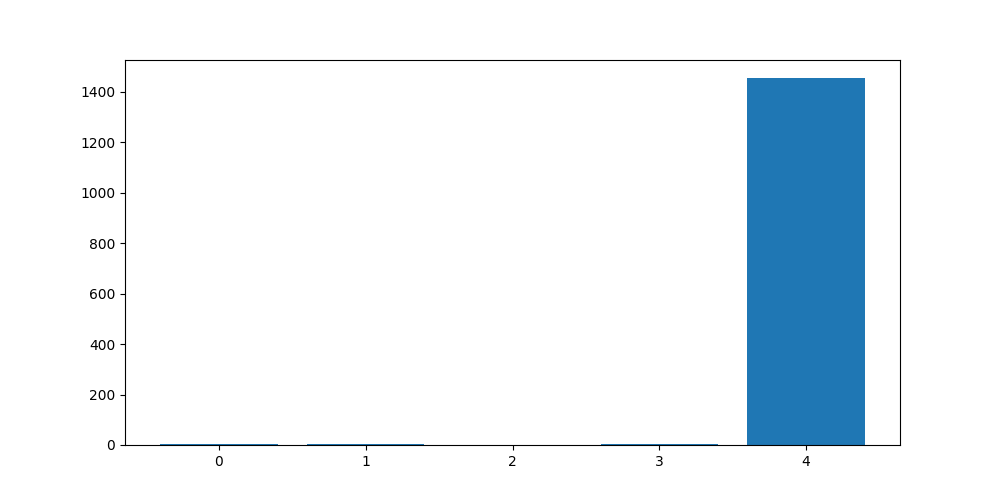

In [529]:
#TO IGNORE : NA is ultra majoritary

#PoolQC
PoolQC = data[:,72].copy()
poolqc_mapping = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "NA": 4}
PoolQC = np.array([poolqc_mapping[qual] for qual in PoolQC])

printRepartion(PoolQC, list(poolqc_mapping.values()))
plotRepartition(PoolQC, list(poolqc_mapping.values()))

PoolQC = np.nan  #to ignore

--- Values repartition  ---
0 : 59 ( 4.0 %)
1 : 157 ( 10.8 %)
2 : 54 ( 3.7 %)
3 : 11 ( 0.8 %)
4 : 1179 ( 80.8 %)




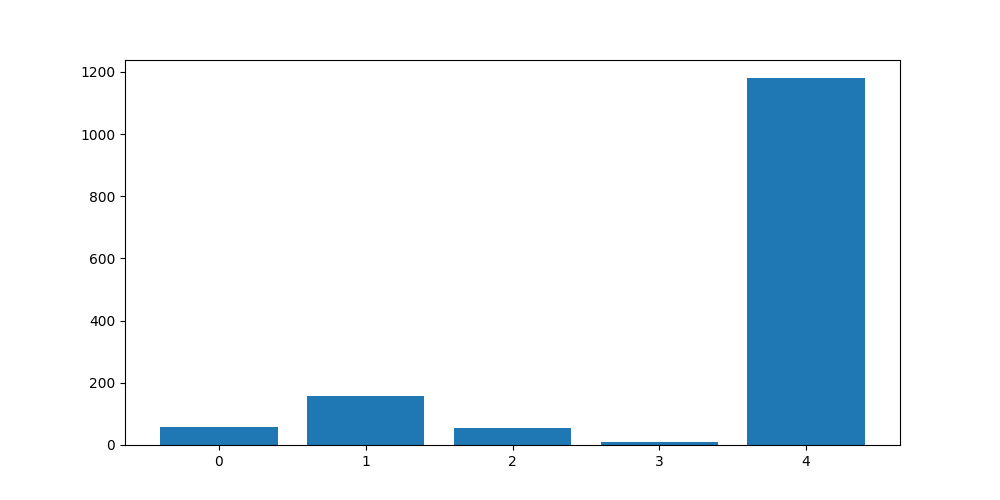

In [530]:
#TO CHECK : weird repartition, we keep it or not ?

#Fence
Fence = data[:,73].copy()
fence_mapping = {"GdPrv": 0, "MnPrv": 1, "GdWo": 2, "MnWw": 3, "NA": 4}
Fence = np.array([fence_mapping[qual] for qual in Fence])

printRepartion(Fence, list(fence_mapping.values()))
plotRepartition(Fence, list(fence_mapping.values()))

--- Values repartition  ---
Elev : 0 ( 0.0 %)
Gar2 : 2 ( 0.1 %)
Othr : 2 ( 0.1 %)
Shed : 49 ( 3.4 %)
TenC : 1 ( 0.1 %)
NA : 1406 ( 96.3 %)




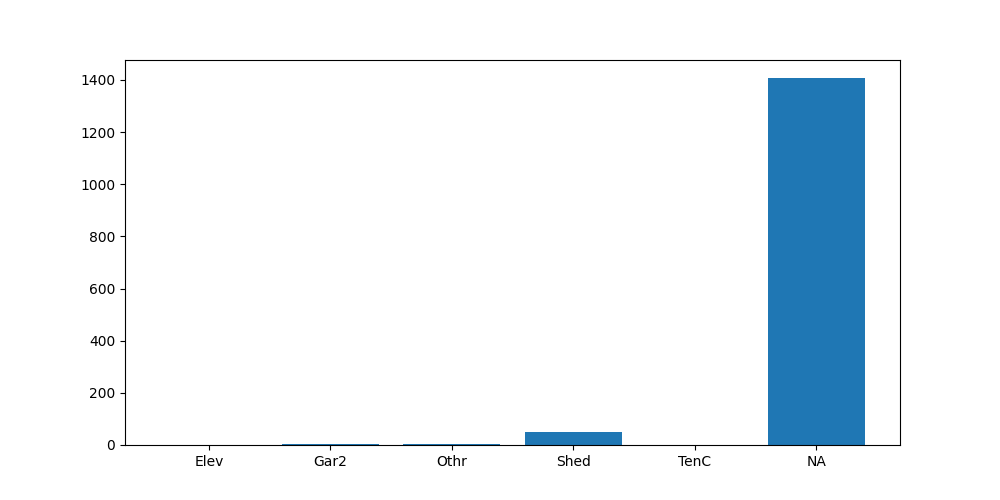

In [533]:
#TO IGNORE : NA is ultra majoritary

#MiscFeature
MiscFeature = data[:,74].copy()
uniqueMiscFeature = np.array(["Elev", "Gar2", "Othr", "Shed", "TenC", "NA"])

printRepartion(MiscFeature, uniqueMiscFeature)
plotRepartition(MiscFeature, uniqueMiscFeature)

MiscFeature = np.nan #to ignore

In [535]:
#TO CHECK : most of the values are 0, we keep it or not ?
#TO CHECK : I removed the MiscFeature, can this work alone ?

#MiscVal
MiscVal = data[:,75].copy().astype(float)
print(MiscVal[:100])


[  0.   0.   0.   0.   0. 700.   0. 350.   0.   0.   0.   0.   0.   0.
   0.   0. 700. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 400.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 700.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 480.   0.   0.
 400. 400.]


In [538]:
#TO IGNORE : Seems irrelevant

#MoSold
MoSold = data[:,76].copy().astype(float)
print(MoSold[:100])

MoSold = np.nan #to ignore


[ 2.  5.  9.  2. 12. 10.  8. 11.  4.  1.  2.  7.  9.  8.  5.  7.  3. 10.
  6.  5. 11.  6.  9.  6.  5.  7.  5.  5. 12.  5.  7.  6.  1.  4.  8.  9.
  6. 10.  1.  6. 12.  7. 12.  7.  5.  2.  8.  7.  6.  1.  7.  9.  5. 11.
  2.  7.  8.  8. 10.  1.  5.  3. 10.  4.  2. 10.  7.  6.  6.  7.  2.  6.
 12.  5.  5. 11.  4.  1.  4.  5.  6.  3. 10.  7.  5.  4.  3.  6. 10.  8.
  7. 12.  8. 11.  5.  4.  8.  5.  5.  1.]


--- Values repartition  ---
WD : 1267 ( 86.8 %)
CWD : 4 ( 0.3 %)
VWD : 0 ( 0.0 %)
New : 122 ( 8.4 %)
COD : 43 ( 2.9 %)
Con : 2 ( 0.1 %)
ConLw : 5 ( 0.3 %)
ConLI : 5 ( 0.3 %)
ConLD : 9 ( 0.6 %)
Oth : 3 ( 0.2 %)




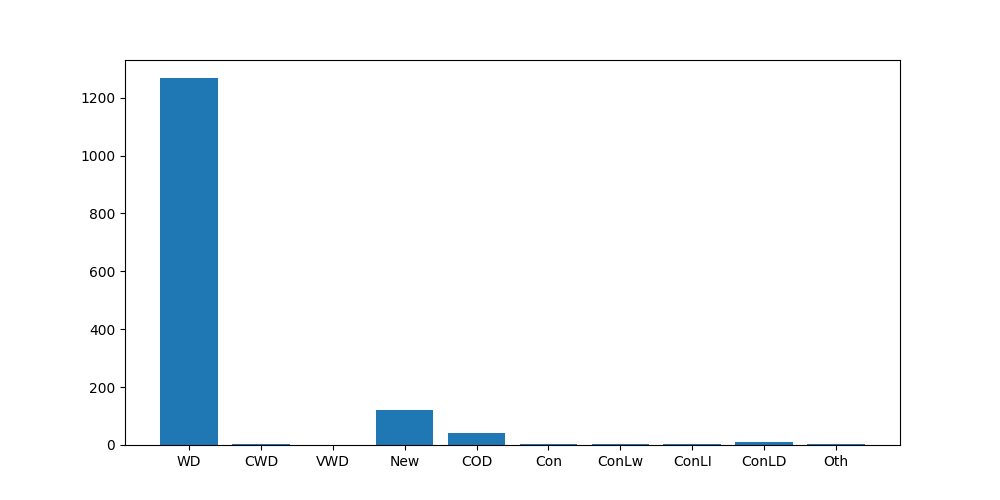

--- Values repartition after cleaning ---
WD : 1267 ( 86.8 %)
New : 122 ( 8.4 %)
other : 71 ( 4.9 %)




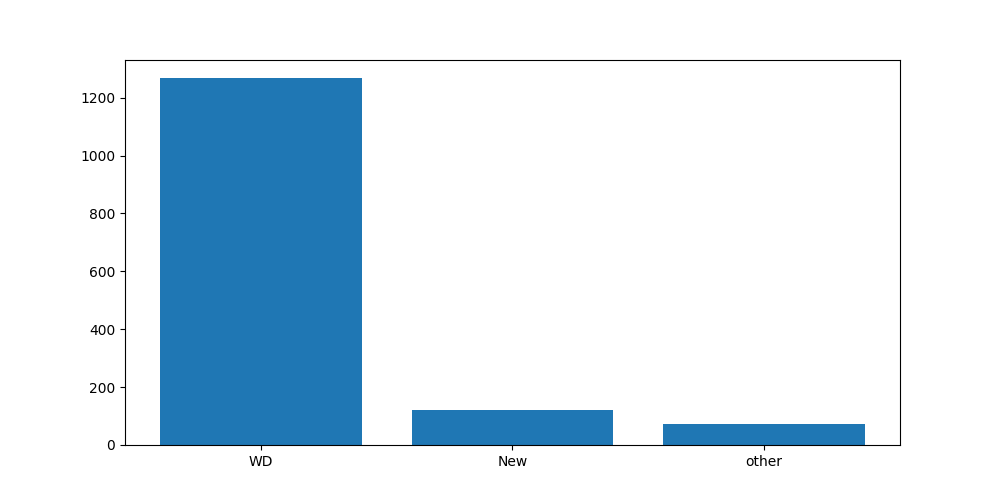

In [541]:
#SaleType
SaleType = data[:,78].copy()
uniqueSaleType = np.array(["WD", "CWD", "VWD", "New", "COD", "Con", 
                           "ConLw", "ConLI", "ConLD", "Oth"])

printRepartion(SaleType, uniqueSaleType)
plotRepartition(SaleType, uniqueSaleType)

#we only keep WD, New, COD and others are grouped in "other"
SaleType[~np.isin(SaleType,  ["WD", "New"])] = "other"
uniqueSaleType = np.array(["WD", "New", "other"])

printRepartion(SaleType, uniqueSaleType, "after cleaning")
plotRepartition(SaleType, uniqueSaleType)


--- Values repartition  ---
Normal : 1198 ( 82.1 %)
Abnorml : 101 ( 6.9 %)
AdjLand : 4 ( 0.3 %)
Alloca : 12 ( 0.8 %)
Family : 20 ( 1.4 %)
Partial : 125 ( 8.6 %)




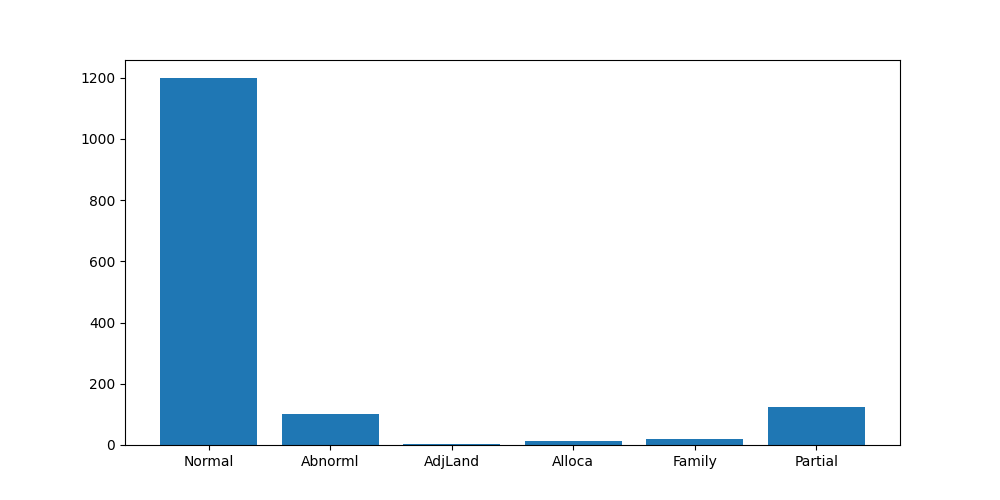

--- Values repartition after cleaning ---
Normal : 1198 ( 82.1 %)
Abnorml : 101 ( 6.9 %)
Partial : 125 ( 8.6 %)
other : 36 ( 2.5 %)




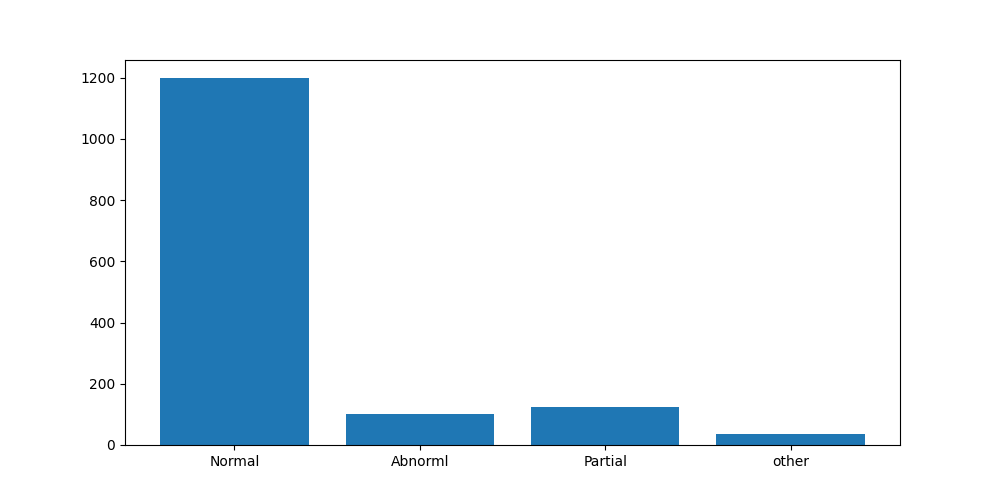

(1460,)


In [545]:
#TO CHECK : is other too small ?

#SaleCondition
SaleCondition = data[:,79].copy()
uniqueSaleCondition = np.array(["Normal", "Abnorml", "AdjLand", "Alloca", 
                                "Family", "Partial"])

printRepartion(SaleCondition, uniqueSaleCondition)
plotRepartition(SaleCondition, uniqueSaleCondition)

#we only keep Normal, Abnorml, Partial and others are grouped in "other"
SaleCondition[~np.isin(SaleCondition,  ["Normal", "Abnorml", "Partial"])] = "other"
uniqueSaleCondition = np.array(["Normal", "Abnorml", "Partial", "other"])

printRepartion(SaleCondition, uniqueSaleCondition, "after cleaning")
plotRepartition(SaleCondition, uniqueSaleCondition)
